# بسم الله الرحمن الرحيم

### Team Members
- Omar Morshdy
- Dima Ayad 
- Mohamed Ashraf
- Philopater Ayman
- Omar Reda

## Project Description  
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. 
 
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Competition's link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques 

### In this Notebook i will go through:
-
-
-
-
Remember: Any information that i state about a feature is present in data_descripition.txt

---

## Import All libraries we may need

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None) # 3shan 22dr ashouf koul al colums
pd.set_option('display.max_row',100) # 3shan 22dr ashouf koul al rows
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score

import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# almktba de gamda w hnshoof ht3ml eh 2odam hwa mn asm al methods algybnha mn gwaha byna alhya compare models
from pycaret.regression import setup, compare_models, predict_model 

from catboost import CatBoostRegressor
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression

## Read Data Frame
### Data is splited to three 
1. trained data
2. testing data
3. sample submission **to know your accuracy in the end**

In [3]:
train0 = pd.read_csv('train.csv')
test0 = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

## Data shape

### 79 feature **explanatory variables**
### 1460 train data + 1459 test data will give 2919 rows

In [4]:
print("Train_data shape = ",train0.shape)
print("Test_data shape = ",test0.shape)

Train_data shape =  (1460, 81)
Test_data shape =  (1459, 80)


In [5]:
train0.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
# test -> is the same train data but not have SalePrice da altby3y y3ny (●'◡'●)
test0.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [7]:
sample_submission

Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]

### 81 feature in our dataset, 1 is our target variable, 1 is ID column which we can ignore, leaving us with 79 explanatory variables

In [8]:

target = train0['SalePrice']
train1 = train0.drop(['Id','SalePrice'], axis=1) # hndrop mn hna al target bt3na whwa al SalePrice and Id 3shan lma negy n3ml concat m3 al test 2odam wkman doul msh 3yznhom dlw2ty
test_ids = test0['Id']
test1 = test0.drop('Id', axis=1)


In [9]:
train1.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [10]:
test1.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH         80.0    11622   Pave   NaN      Reg   
1          20       RL         81.0    14267   Pave   NaN      IR1   
2          60       RL         74.0    13830   Pave   NaN      IR1   
3          60       RL         78.0     9978   Pave   NaN      IR1   
4         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd             7        Typ           

That's a lot of columns. In simple words, we need to be selective of what features to include. Note: Read the data description carefully to understand the column features.

---

## Explore Numerical Features

In [11]:
def summary_num(numerical_features):
        """ Function to summarize all numeric features"""
        print(f'There are {len(numerical_features)} observation in our dataset, {len(numerical_features[numerical_features.duplicated()])} of which are duplicated')
        desc = numerical_features.describe().T
        # hnzwd dlw2ty kam haga mn 3ndna
        desc['nunique'] = numerical_features.nunique() # hya number of unique value tknow is it Continous feature or categoricalfeatures
        desc['%unique'] = numerical_features.nunique() / len(numerical_features) * 100
        desc['Null'] = numerical_features.isna().sum()
        return desc

In [12]:
numerical_features = train1.select_dtypes(include=[np.number])
summary_num(numerical_features=numerical_features)

There are 1460 observation in our dataset, 1 of which are duplicated


count          mean          std     min      25%     50%  \
MSSubClass     1460.0     56.897260    42.300571    20.0    20.00    50.0   
LotFrontage    1201.0     70.049958    24.284752    21.0    59.00    69.0   
LotArea        1460.0  10516.828082  9981.264932  1300.0  7553.50  9478.5   
OverallQual    1460.0      6.099315     1.382997     1.0     5.00     6.0   
OverallCond    1460.0      5.575342     1.112799     1.0     5.00     5.0   
YearBuilt      1460.0   1971.267808    30.202904  1872.0  1954.00  1973.0   
YearRemodAdd   1460.0   1984.865753    20.645407  1950.0  1967.00  1994.0   
MasVnrArea     1452.0    103.685262   181.066207     0.0     0.00     0.0   
BsmtFinSF1     1460.0    443.639726   456.098091     0.0     0.00   383.5   
BsmtFinSF2     1460.0     46.549315   161.319273     0.0     0.00     0.0   
BsmtUnfSF      1460.0    567.240411   441.866955     0.0   223.00   477.5   
TotalBsmtSF    1460.0   1057.429452   438.705324     0.0   795.75   991.5   
1stFlrSF       1460.0   1162.626712   386.587738   334.0   882.00  1087.0   
2ndFlrSF       1460.0    346.992466   436.528436     0.0     0.00     0.0   
LowQualFinSF   1460.0      5.844521    48.623081     0.0     0.00     0.0   
GrLivArea      1460.0   1515.463699   525.480383   334.0  1129.50  1464.0   
BsmtFullBath   1460.0      0.425342     0.518911     0.0     0.00     0.0   
BsmtHalfBath   1460.0      0.057534     0.238753     0.0     0.00     0.0   
FullBath       1460.0      1.565068     0.550916     0.0     1.00     2.0   
HalfBath       1460.0      0.382877     0.502885     0.0     0.00     0.0   
BedroomAbvGr   1460.0      2.866438     0.815778     0.0     2.00     3.0   
KitchenAbvGr   1460.0      1.046575     0.220338     0.0     1.00     1.0   
TotRmsAbvGrd   1460.0      6.517808     1.625393     2.0     5.00     6.0   
Fireplaces     1460.0      0.613014     0.644666     0.0     0.00     1.0   
GarageYrBlt    1379.0   1978.506164    24.689725  1900.0  1961.00  1980.0   
GarageCars     1460.0      1.767123     0.747315     0.0     1.00     2.0   
GarageArea     1460.0    472.980137   213.804841     0.0   334.50   480.0   
WoodDeckSF     1460.0     94.244521   125.338794     0.0     0.00     0.0   
OpenPorchSF    1460.0     46.660274    66.256028     0.0     0.00    25.0   
EnclosedPorch  1460.0     21.954110    61.119149     0.0     0.00     0.0   
3SsnPorch      1460.0      3.409589    29.317331     0.0     0.00     0.0   
ScreenPorch    1460.0     15.060959    55.757415     0.0     0.00     0.0   
PoolArea       1460.0      2.758904    40.177307     0.0     0.00     0.0   
MiscVal        1460.0     43.489041   496.123024     0.0     0.00     0.0   
MoSold         1460.0      6.321918     2.703626     1.0     5.00     6.0   
YrSold         1460.0   2007.815753     1.328095  2006.0  2007.00  2008.0   

                    75%       max  nunique    %unique  Null  
MSSubClass        70.00     190.0       15   1.027397     0  
LotFrontage       80.00     313.0      110   7.534247   259  
LotArea        11601.50  215245.0     1073  73.493151     0  
OverallQual        7.00      10.0       10   0.684932     0  
OverallCond        6.00       9.0        9   0.616438     0  
YearBuilt       2000.00    2010.0      112   7.671233     0  
YearRemodAdd    2004.00    2010.0       61   4.178082     0  
MasVnrArea       166.00    1600.0      327  22.397260     8  
BsmtFinSF1       712.25    5644.0      637  43.630137     0  
BsmtFinSF2         0.00    1474.0      144   9.863014     0  
BsmtUnfSF        808.00    2336.0      780  53.424658     0  
TotalBsmtSF     1298.25    6110.0      721  49.383562     0  
1stFlrSF        1391.25    4692.0      753  51.575342     0  
2ndFlrSF         728.00    2065.0      417  28.561644     0  
LowQualFinSF       0.00     572.0       24   1.643836     0  
GrLivArea       1776.75    5642.0      861  58.972603     0  
BsmtFullBath       1.00       3.0        4   0.273973     0  
BsmtHalfBath       0.00       2.0        3   0.205

Insights from numerical features summary:
- There are many numerical variables that are categorical and need to be treated as such during feature engineering
- Most of features doesn't have null values ( Those which have must be checked)
- No duplicate values


---

## Explore Categorical Features

In [13]:
def summary_cat(categorical_features):
    """ Function to summarize all Categorical features"""

    print(f'There are {len(categorical_features)} observation in our dataset, {len(categorical_features[categorical_features.duplicated()])} of which are duplicated')
    
    desc = categorical_features.describe().T
    unique = categorical_features.nunique()
    desc['%unique'] = unique / len(categorical_features) * 100
    desc['Null'] = categorical_features.isna().sum()
    return desc

In [14]:
categorical_features = train1.select_dtypes(include=['object'])
summary_cat(categorical_features=categorical_features)

There are 1460 observation in our dataset, 21 of which are duplicated


count unique      top  freq   %unique  Null
MSZoning       1460      5       RL  1151  0.342466     0
Street         1460      2     Pave  1454  0.136986     0
Alley            91      2     Grvl    50  0.136986  1369
LotShape       1460      4      Reg   925  0.273973     0
LandContour    1460      4      Lvl  1311  0.273973     0
Utilities      1460      2   AllPub  1459  0.136986     0
LotConfig      1460      5   Inside  1052  0.342466     0
LandSlope      1460      3      Gtl  1382  0.205479     0
Neighborhood   1460     25    NAmes   225  1.712329     0
Condition1     1460      9     Norm  1260  0.616438     0
Condition2     1460      8     Norm  1445  0.547945     0
BldgType       1460      5     1Fam  1220  0.342466     0
HouseStyle     1460      8   1Story   726  0.547945     0
RoofStyle      1460      6    Gable  1141  0.410959     0
RoofMatl       1460      8  CompShg  1434  0.547945     0
Exterior1st    1460     15  VinylSd   515  1.027397     0
Exterior2nd    1460     16  VinylSd   504  1.095890     0
MasVnrType     1452      4     None   864  0.273973     8
ExterQual      1460      4       TA   906  0.273973     0
ExterCond      1460      5       TA  1282  0.342466     0
Foundation     1460      6    PConc   647  0.410959     0
BsmtQual       1423      4       TA   649  0.273973    37
BsmtCond       1423      4       TA  1311  0.273973    37
BsmtExposure   1422      4       No   953  0.273973    38
BsmtFinType1   1423      6      Unf   430  0.410959    37
BsmtFinType2   1422      6      Unf  1256  0.410959    38
Heating        1460      6     GasA  1428  0.410959     0
HeatingQC      1460      5       Ex   741  0.342466     0
CentralAir     1460      2        Y  1365  0.136986     0
Electrical     1459      5    SBrkr  1334  0.342466     1
KitchenQual    1460      4       TA   735  0.273973     0
Functional     1460      7      Typ  1360  0.479452     0
FireplaceQu     770      5       Gd   380  0.342466   690
GarageType     1379      6   Attchd   870  0.410959    81
GarageFinish   1379      3      Unf   605  0.205479    81
GarageQual     1379      5       TA  1311  0.342466    81
GarageCond     1379      5       TA  1326  0.342466    81
PavedDrive     1460      3        Y  1340  0.205479     0
PoolQC            7      3       Gd     3  0.205479  1453
Fence           281      4    MnPrv   157  0.273973  1179
MiscFeature      54      4     Shed    49  0.273973  1406
SaleType       1460      9       WD  1267  0.616438     0
SaleCondition  1460      6   Normal  1198  0.410959     0

Insights from Categorical features summary:
- There are many null values in multiple features (Must be checked) (Null values might represent feature not present in house??)
- No duplicate values

---

# Let's Explore Our Data

Let's take a look on the target variable

In [15]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

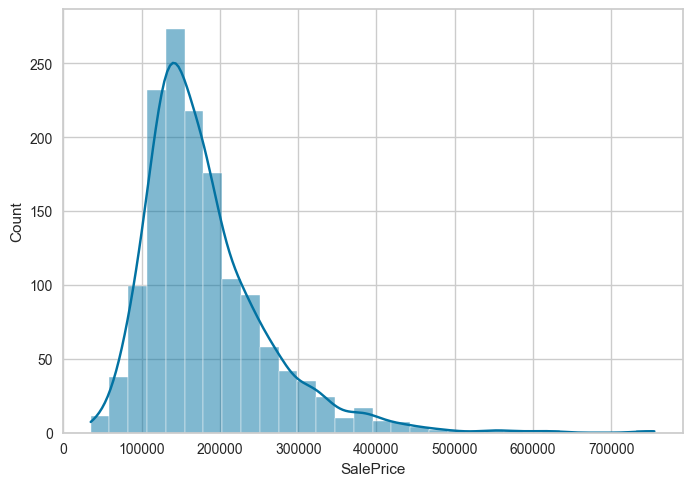

In [16]:
plt.plot(figsize=(10,10), dpi=300)
sns.histplot(x=target, bins=30, kde=True)
plt.show()

In [17]:
# skewness
print("Skewness: %f" % target.skew())

Skewness: 1.882876


- Nothing seems weird about sales prices distribution as it's normal for most houses to be priced at a median, with a small amount of outliers priced expensively
- It deviate from normal distribution
- Positive skew

---

Let's take a look on Numerical data for following purposes:
- Check relationship between feature and target variable
- Check out Distribution
- Check if that data is categorical but saved as numeric
- Understand each feature for purpose of feature engineering 
    - i want to go through this slow approach of plotting each feature to clearly understand it and figure out new features

In [18]:
# we have 36 numeric feature
numerical_features.shape

(1460, 36)

In [19]:
numerical_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [20]:
# tb3n a7na 3rfeen wshofna mn al description al foo2 an 3ndna fe hgat category gwa bs numeric f3yzeen n3rf hya eh wn7otha fe list
cat_feat = []

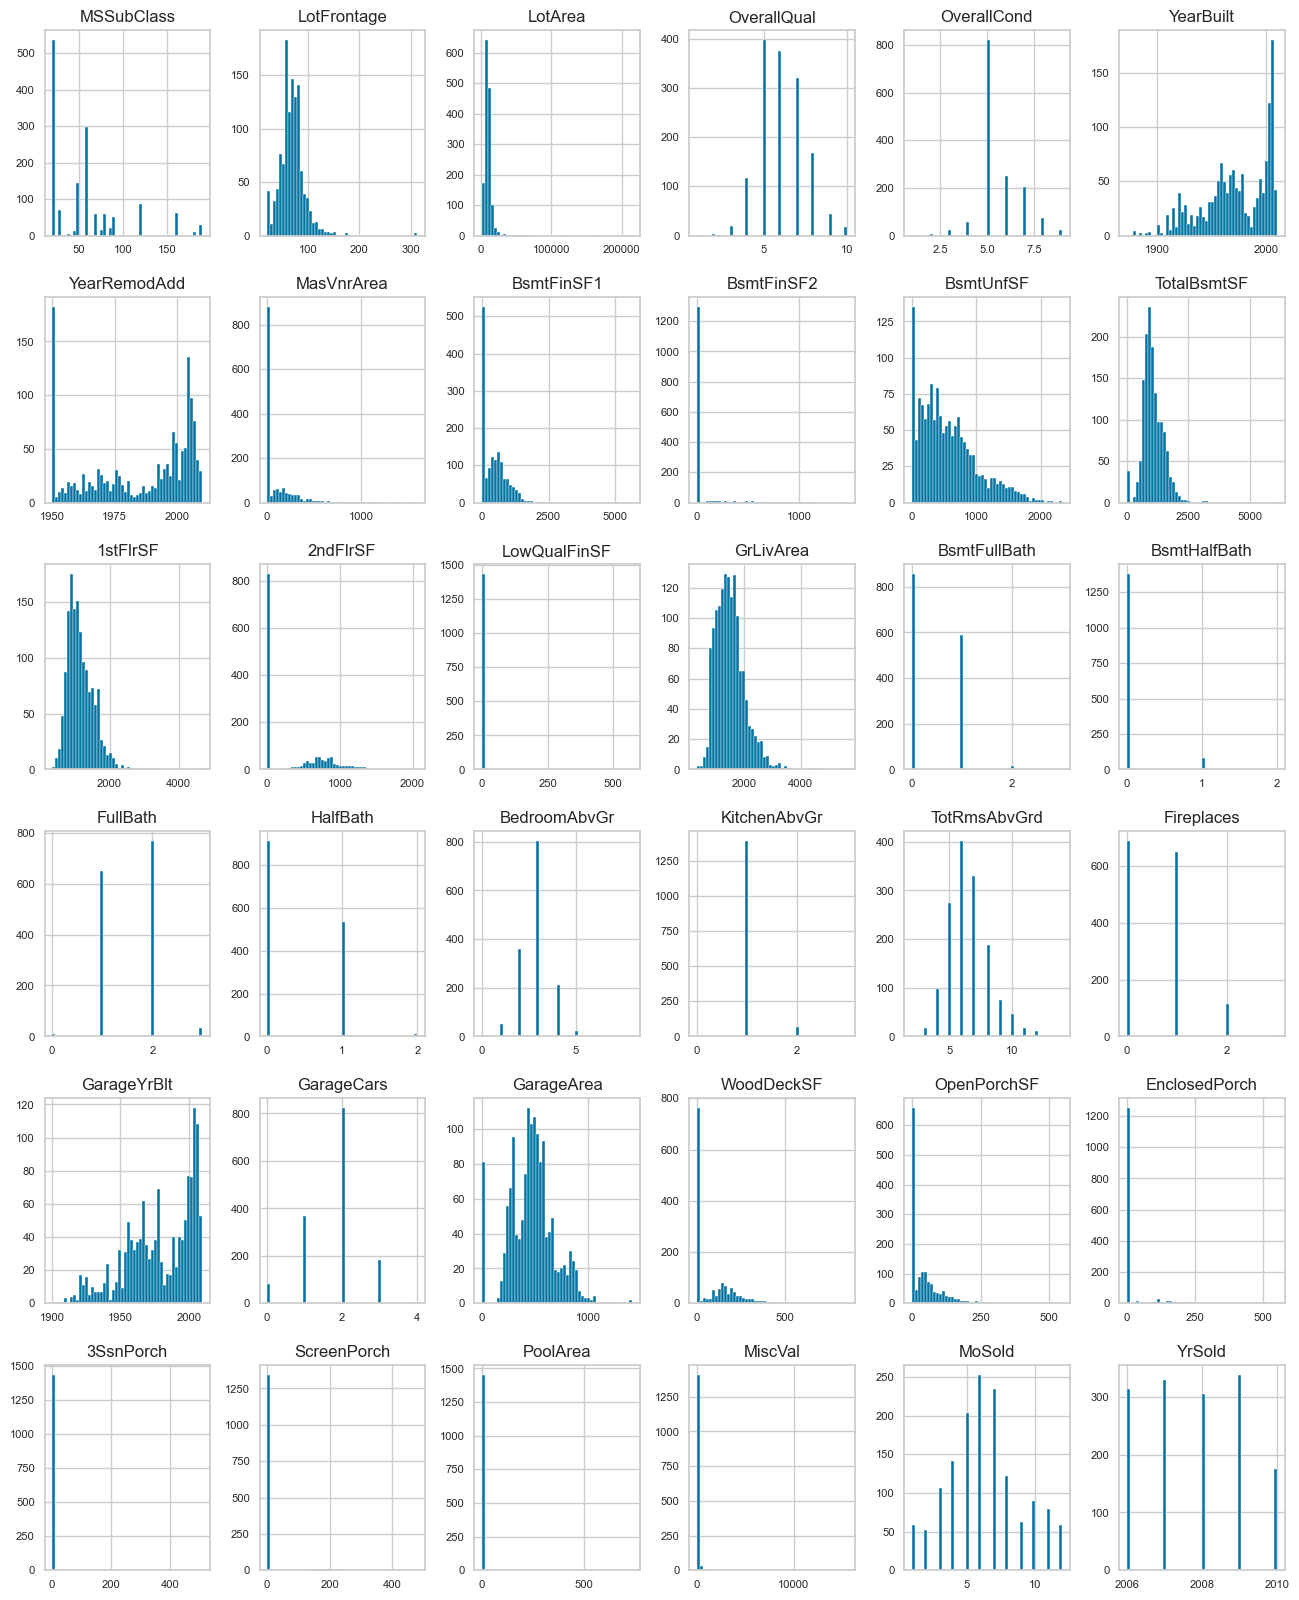

In [21]:
numerical_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

MSSubClass feature: Identifies the type of dwelling involved in the sale.
- from it's histogram distribution it seems that it's a categorical variable

In [22]:
numerical_features['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

- Each unique number idenity type of dweling
- This feature should be changed into categorical in feature engineering

In [23]:
cat_feat.append('MSSubClass')

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

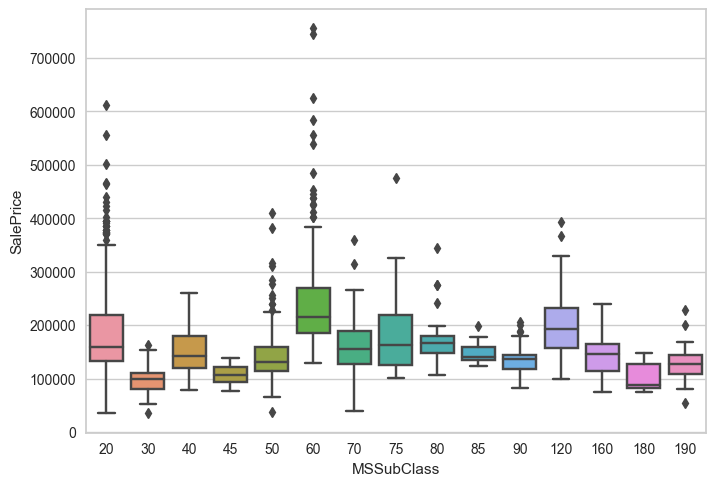

In [24]:
sns.boxplot( x=numerical_features['MSSubClass'], y=target)

- It seems that different MSSubClass have different prices, and that some types have alot of outliers

LotFrontage: Linear feet of street connected to property
- This feature is a continous feature

Text(0, 0.5, 'SalePrice')

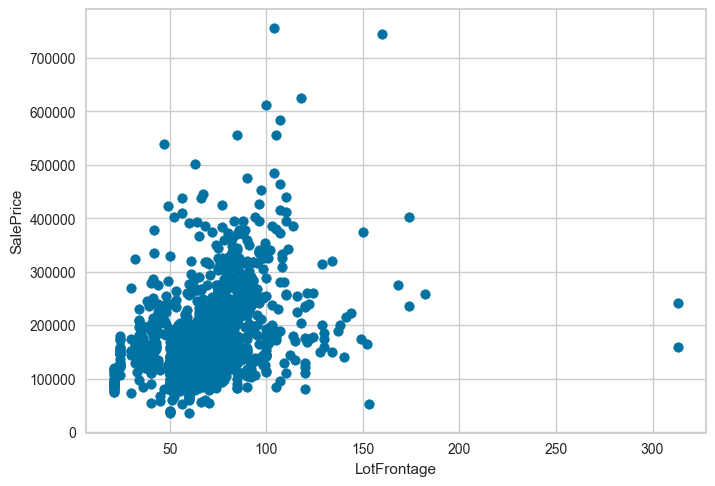

In [25]:
plt.scatter(numerical_features['LotFrontage'], target)
plt.xlabel("LotFrontage")
plt.ylabel('SalePrice')

- helw awy alklam da seems that on average a higher LotFrontage results in a higher SalePrice

**LotArea: Lot size in square feet**
- This feature is a continous feature

Text(0, 0.5, 'SalePrice')

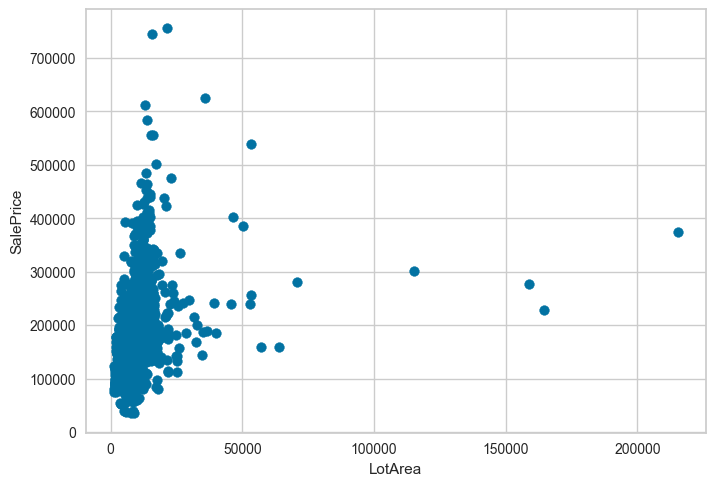

In [26]:
plt.scatter(numerical_features['LotArea'], target)
plt.xlabel("LotArea")
plt.ylabel('SalePrice')

- Seems that bigger LotArea doesn't mean a higher saleprice

**OverallQual feature: Rates the overall material and finish of the house**
- from it's histogram distribution it seems that it's a categorical variable
- Each unique number idenity rating of house material & finish
- This feature should be changed into categorical in feature engineering

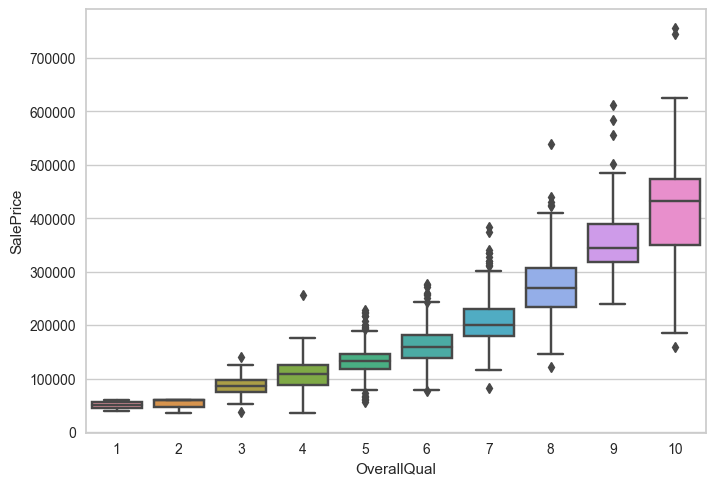

In [27]:
sns.boxplot(x = numerical_features['OverallQual'], y = target)
cat_feat.append('OverallQual')

- That looks like a Linear relationship between quality and saleprice, which make sense since that people normally like houses with better quality
- This is going to be an important feature for sure

**OverallCond: Rates the overall condition of the house**
- from it's histogram distribution it seems that it's a categorical variable
- Each unique number idenity rating of house condition
- This feature should be changed into categorical in feature engineering

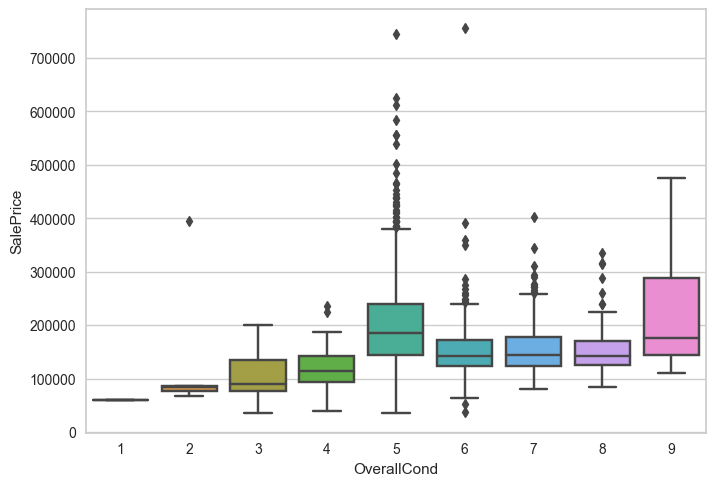

In [28]:
sns.boxplot(x=numerical_features['OverallCond'], y=target)
cat_feat.append('OverallCond')

- Better OverallCond seems to usually have higher prices that house with lower overallcond, but the relation isn't as strong as overallqual feature

**YearBuilt: Original construction date**
- Even though there is a lot of values in year built feature, it's still considered a categorical variable
- This feature should be changed into a categorical feature (maybe calculate building age??)(maybe use YearRemodAdd to calculate something?)

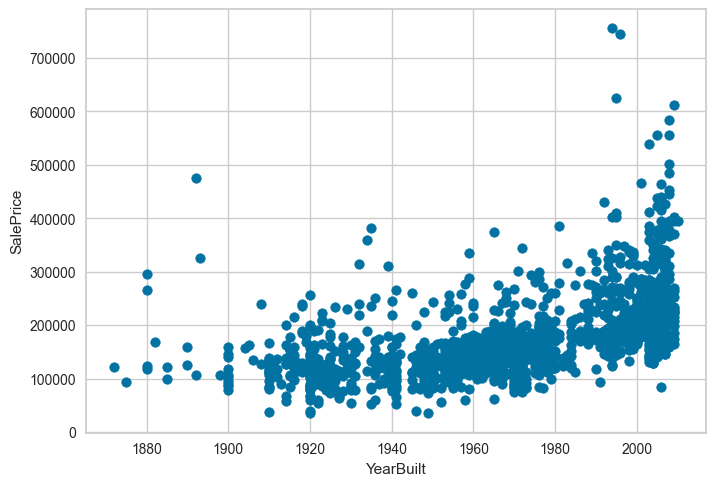

In [29]:
plt.scatter(numerical_features['YearBuilt'], target)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
cat_feat.append('YearBuilt')

- Year built seems to have positive relation with Saleprice, newer buildings on average have higher prices

**YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)**
- Even though there is a lot of values in year built feature, it's still considered a categorical variable
- This feature should be changed into a categorical feature (Maybe it can help in better estimating house age?)
- (Maybe compare between houses that got remodeled and those that didn't?)

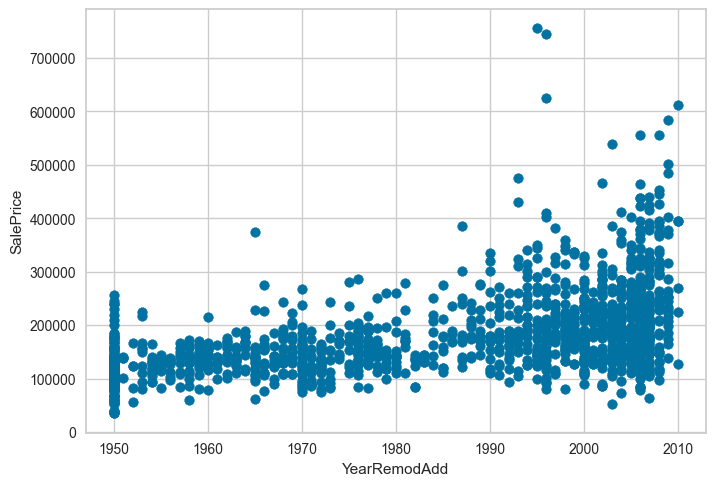

In [30]:
plt.scatter(numerical_features['YearRemodAdd'], target)
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')
cat_feat.append('YearRemodAdd')

- On average it seems that sale price increases the later the remodeling occured

**MasVnrArea: Masonry veneer area in square feet**
- This feature is a continous variable

Text(0, 0.5, 'SalePrice')

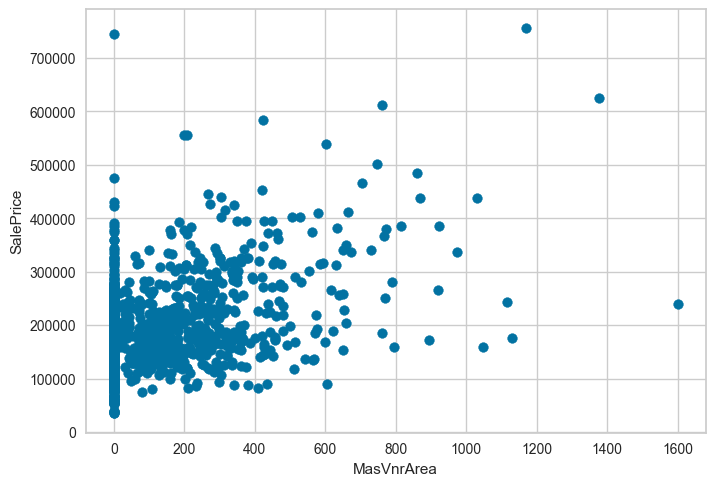

In [31]:
plt.scatter(numerical_features['MasVnrArea'], target)
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')

- From scatterplot above, it seems that saleprice isn't affected by MasVnrArea

**TotalBsmtSF: Total square feet of basement area**
- This Feature is a continous variable

Text(0, 0.5, 'SalePrice')

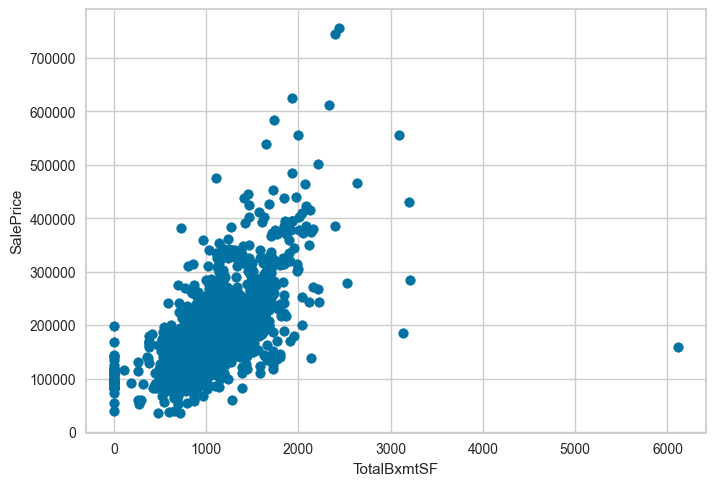

In [32]:
plt.scatter(numerical_features['TotalBsmtSF'], target)
plt.xlabel('TotalBxmtSF')
plt.ylabel('SalePrice')

- There is a linear relation between SalePrice & Basement size, Bigger basements usually means higher prices

**1stFlrSF: First Floor square feet 2ndFlrSF: Second floor square feet**
- Those features are continous variables

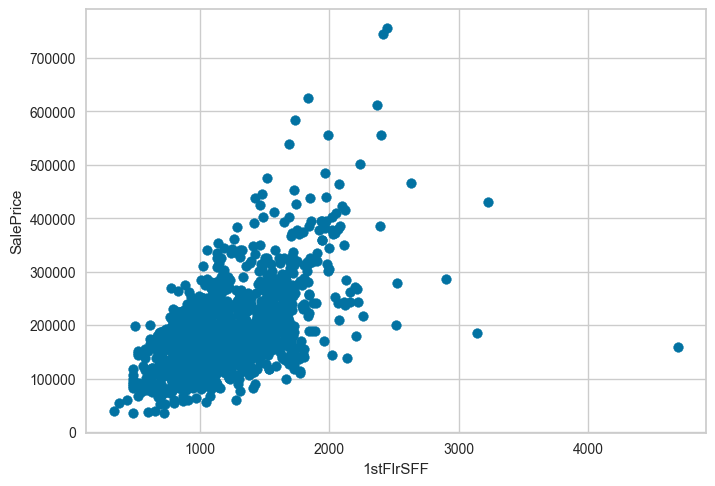

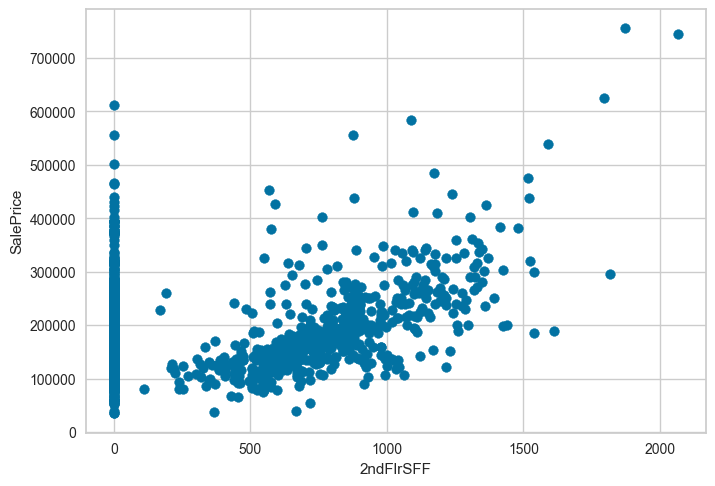

In [33]:
plt.scatter(numerical_features['1stFlrSF'],target)
plt.xlabel('1stFlrSFF')
plt.ylabel('SalePrice')
plt.show()
plt.scatter(numerical_features['2ndFlrSF'],target)
plt.xlabel('2ndFlrSFF')
plt.ylabel('SalePrice')
plt.show()

- There is a linear relation between size of a floor & Sale price
- A lot of zero values in 2nd floor means that there is no 2nd floor in this house

**LowQualFinSF: Low quality finished square feet (all floors)**
- Most values are zeros, it would be better to drop this feature

**GrLivArea: Above grade (ground) living area square feet**
- This feature is a continous feature

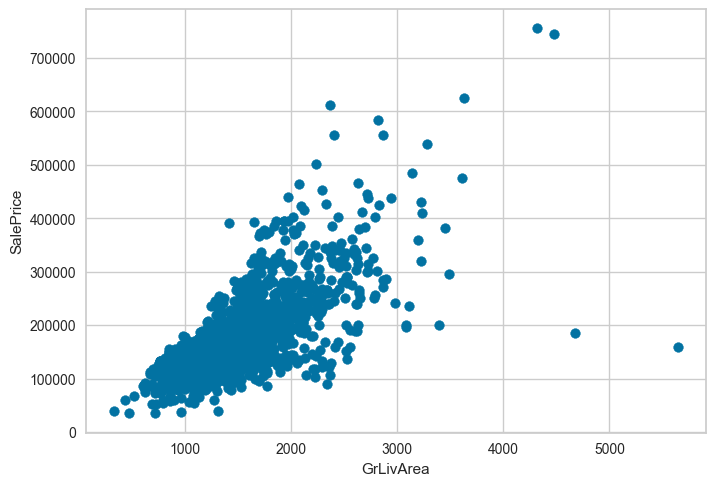

In [34]:
plt.scatter(numerical_features['GrLivArea'],target)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

- Eh al7lawa de, this scatter plot clearly show a strong linear relation between SalePrice & GrLivArea

**BsmtFullBath: Basement full bathrooms**
- This feature is a categorical feature
- BsmtFullBath Causes prices to increase by a slight margin on average
- BsmtHalfBath doesn't seem to affect price at all

**FullBath: Full bathrooms above grade**  

**HalfBath: Half baths above grade**  

**Bedroom: Bedrooms above grade (does NOT include basement bedrooms)**  

**Kitchen: Kitchens above grade**  

**Fireplaces: Number of fireplaces**  

- All those features are categorical variables

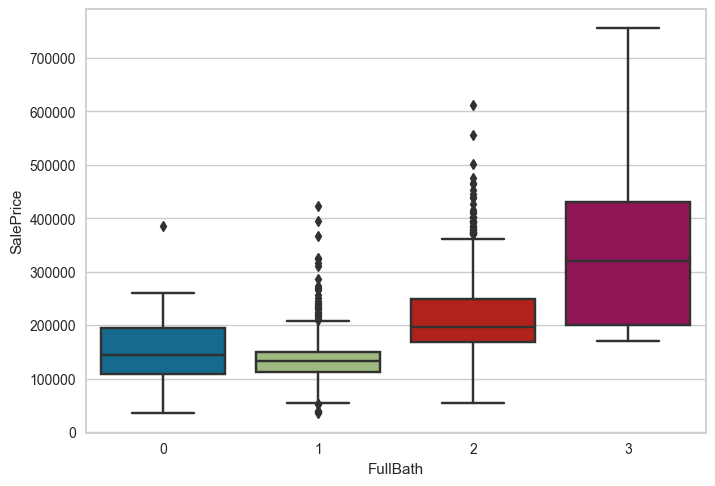

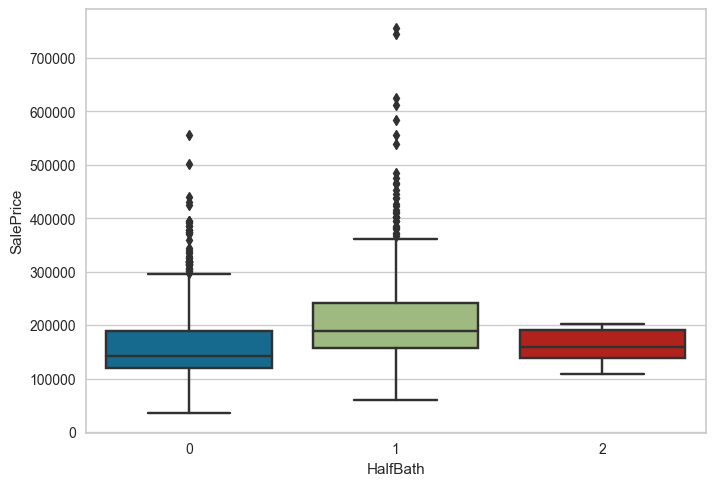

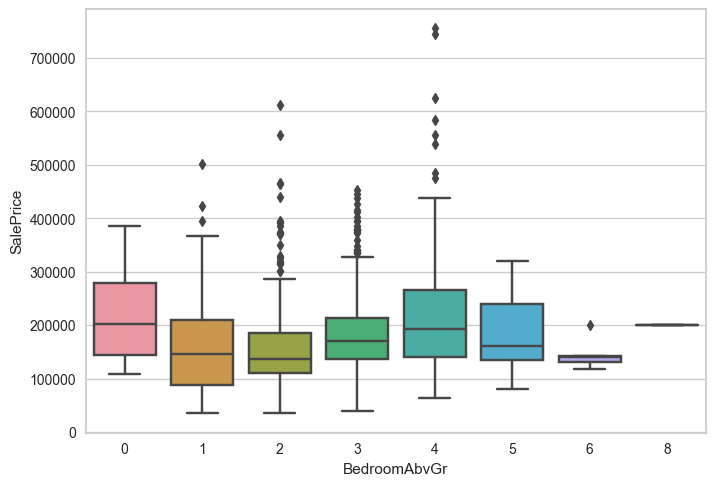

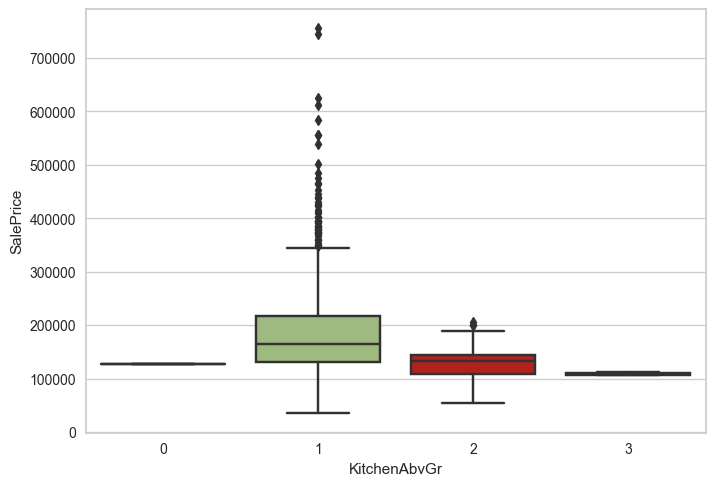

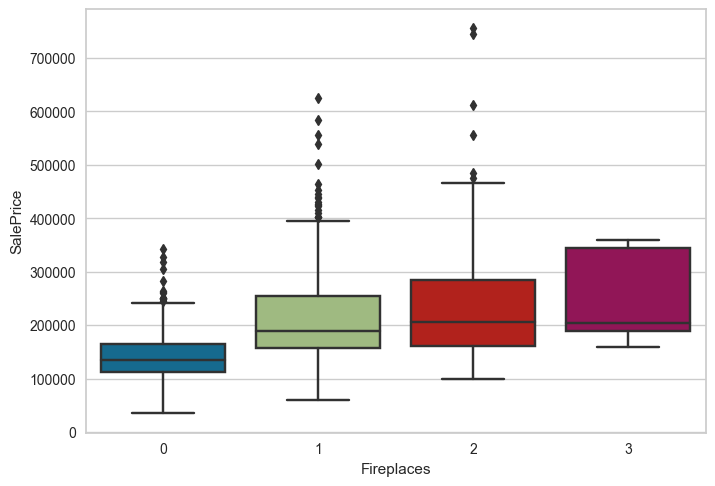

In [35]:
for feature in ['FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces']:
    sns.boxplot(data = numerical_features,x=feature,y=target)
    plt.show()

    cat_feat.append(feature)

- Having more fullbath seems to increase price
- A halfbath present seems to slightly increase price, with no increase if number of halfbaths increase
- Number of bedrooms seems to slightly increase price on average
- Number of kitchens doesn't seem to affect price that much
- Number of Fireplaces seems to increase price

**GarageYrBlt: Year garage was built**
- This feature is a continous variable

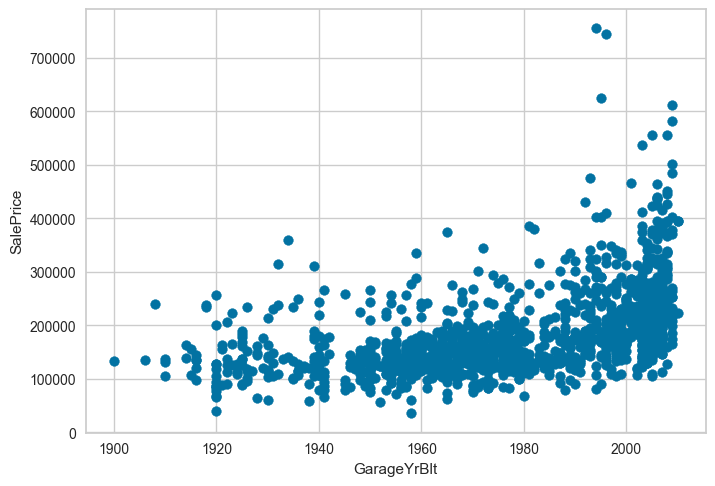

In [36]:
plt.scatter(numerical_features['GarageYrBlt'],target)
plt.xlabel('GarageYrBlt')
plt.ylabel('SalePrice')
plt.show()


- GarageYrBlt seems to affect sale price (Might be just because newer houses usually have newer garages)

**GarageCars: Size of garage in car capacity**
- This is a categorical variable

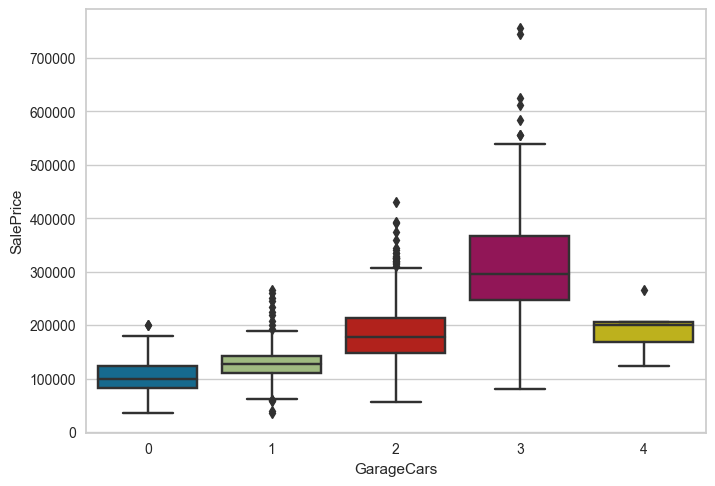

In [37]:
sns.boxplot(x=numerical_features['GarageCars'],y= target)
plt.show()
cat_feat.append('GarageCars')

- Increased garage car capcity seems to have higher prices

**GarageArea: Size of garage in square feet**
- This is a continous variable

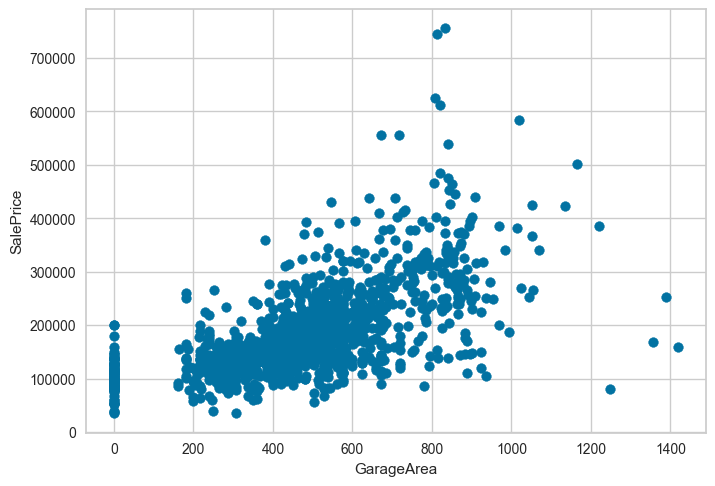

In [38]:
plt.scatter(numerical_features['GarageArea'],target)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

- Increased Garage area usually means higher prices (might be that bigger garages usually have bigger car capacities)

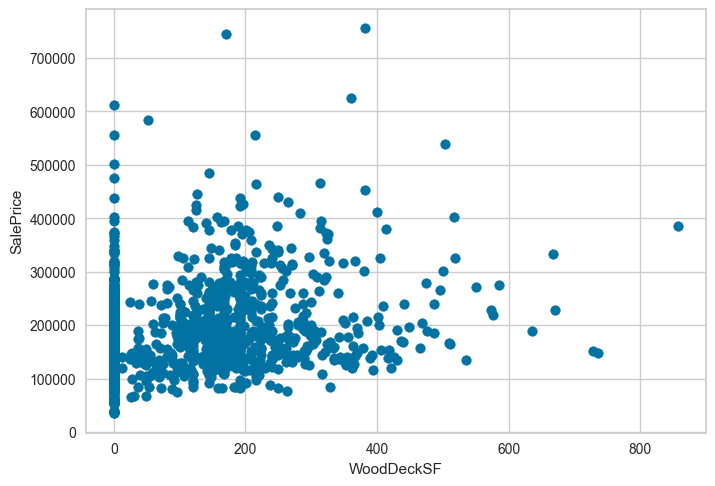

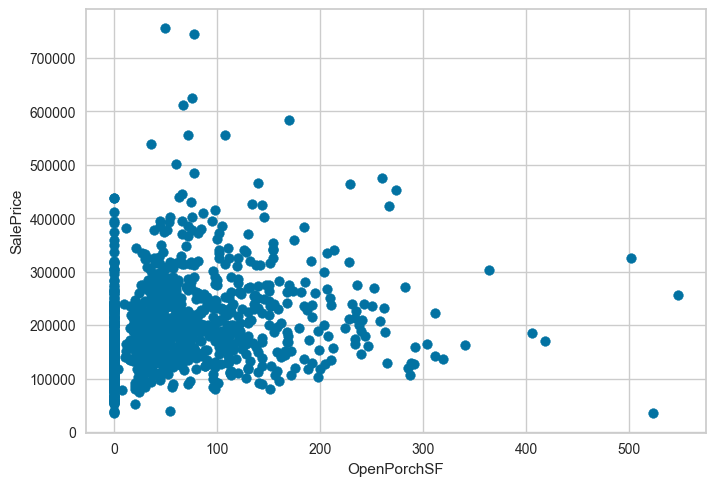

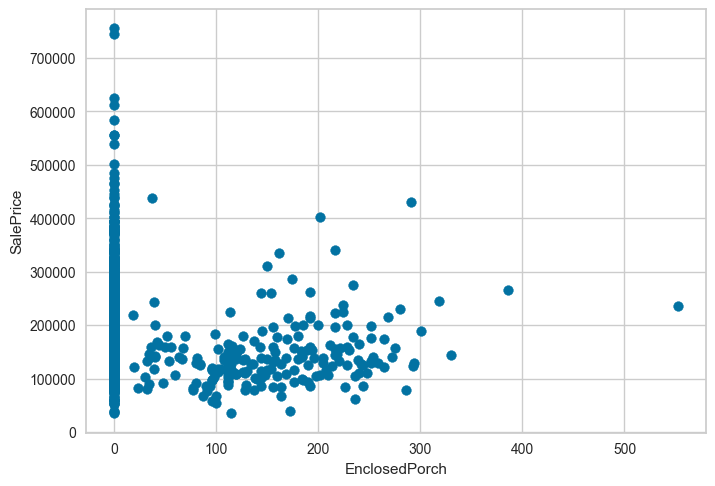

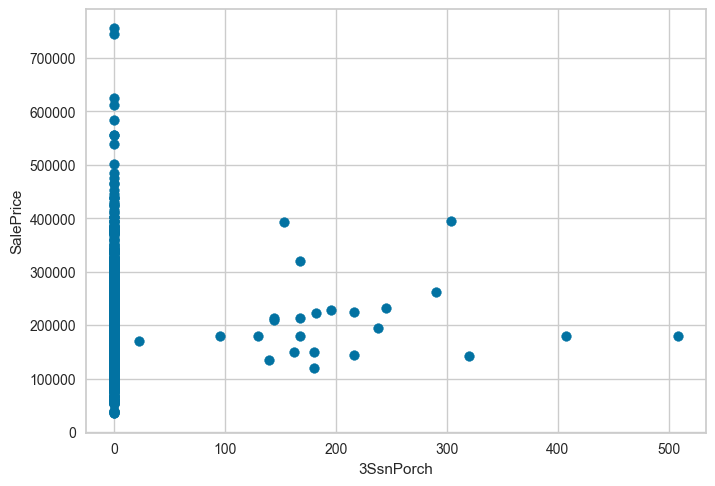

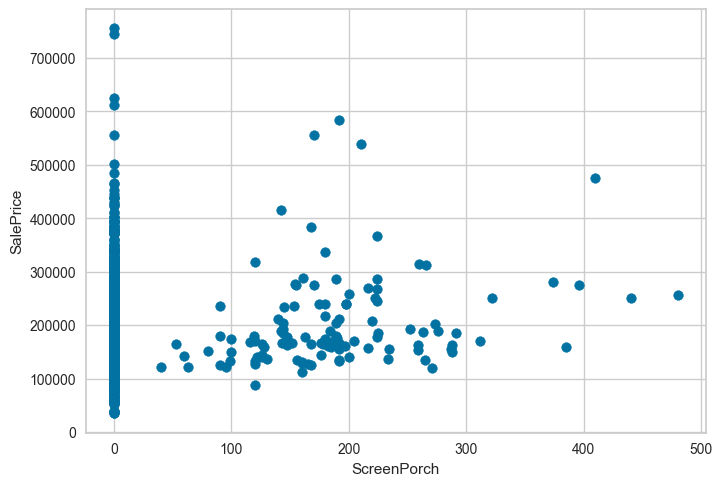

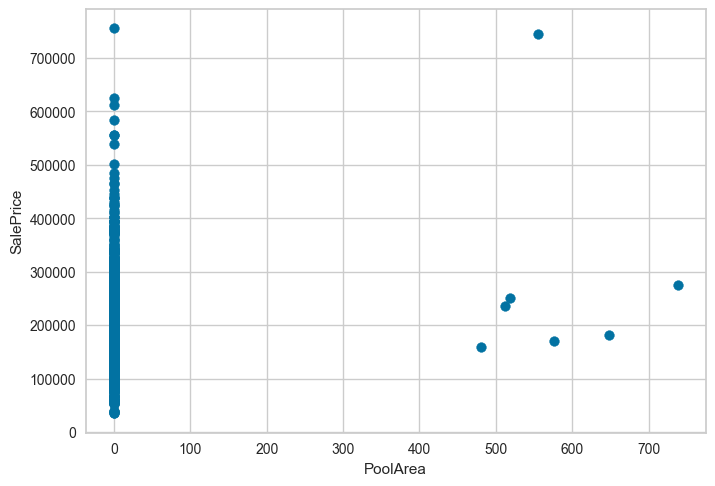

In [39]:
for feature in ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']:
    plt.scatter(numerical_features[feature],target)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()
    # cat_feat.append(feature)

- All of previous features doesn't really seem to affect price

**MoSold: Month House was sold in**
- This is a categorical variable

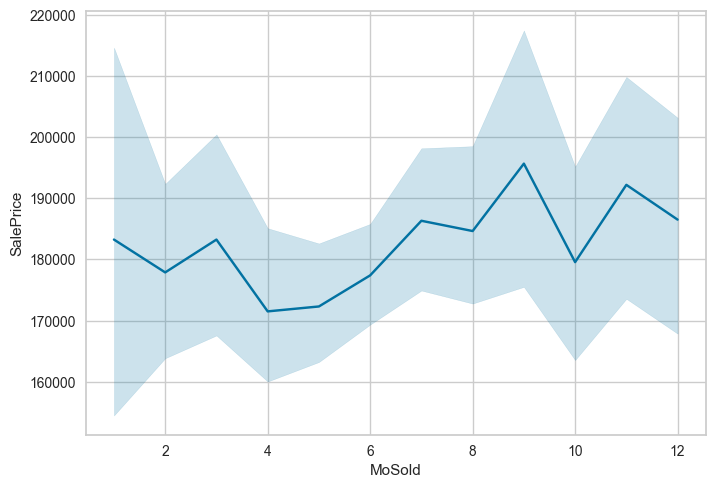

In [40]:
sns.lineplot(x=numerical_features['MoSold'], y=target)
cat_feat.append('MoSold')

- It seems that houses sold in certain seasons have higher prices than houses sold in other seasons

**YrSold: Year Sold (YYYY)**
- This is a categorical feature
- (Use this feature to calculate House age??)

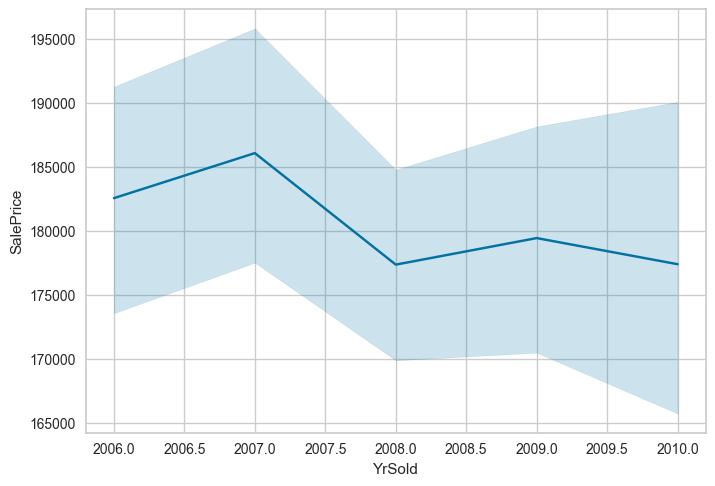

In [41]:
sns.lineplot(x=numerical_features['YrSold'], y=target)
cat_feat.append('YrSold')

- Seems that prices peaked in 2006 and decreased in following years probably due to the house marketing crash

In [42]:
def heatmap(df,label=None):
    plt.figure(figsize = (16,10),dpi=300)
    sns.heatmap(df.corr(method='pearson'),cmap='YlOrRd',annot=True,annot_kws={'size':7})
    plt.title(f'Correlations between features of the {label} set')
    plt.show()

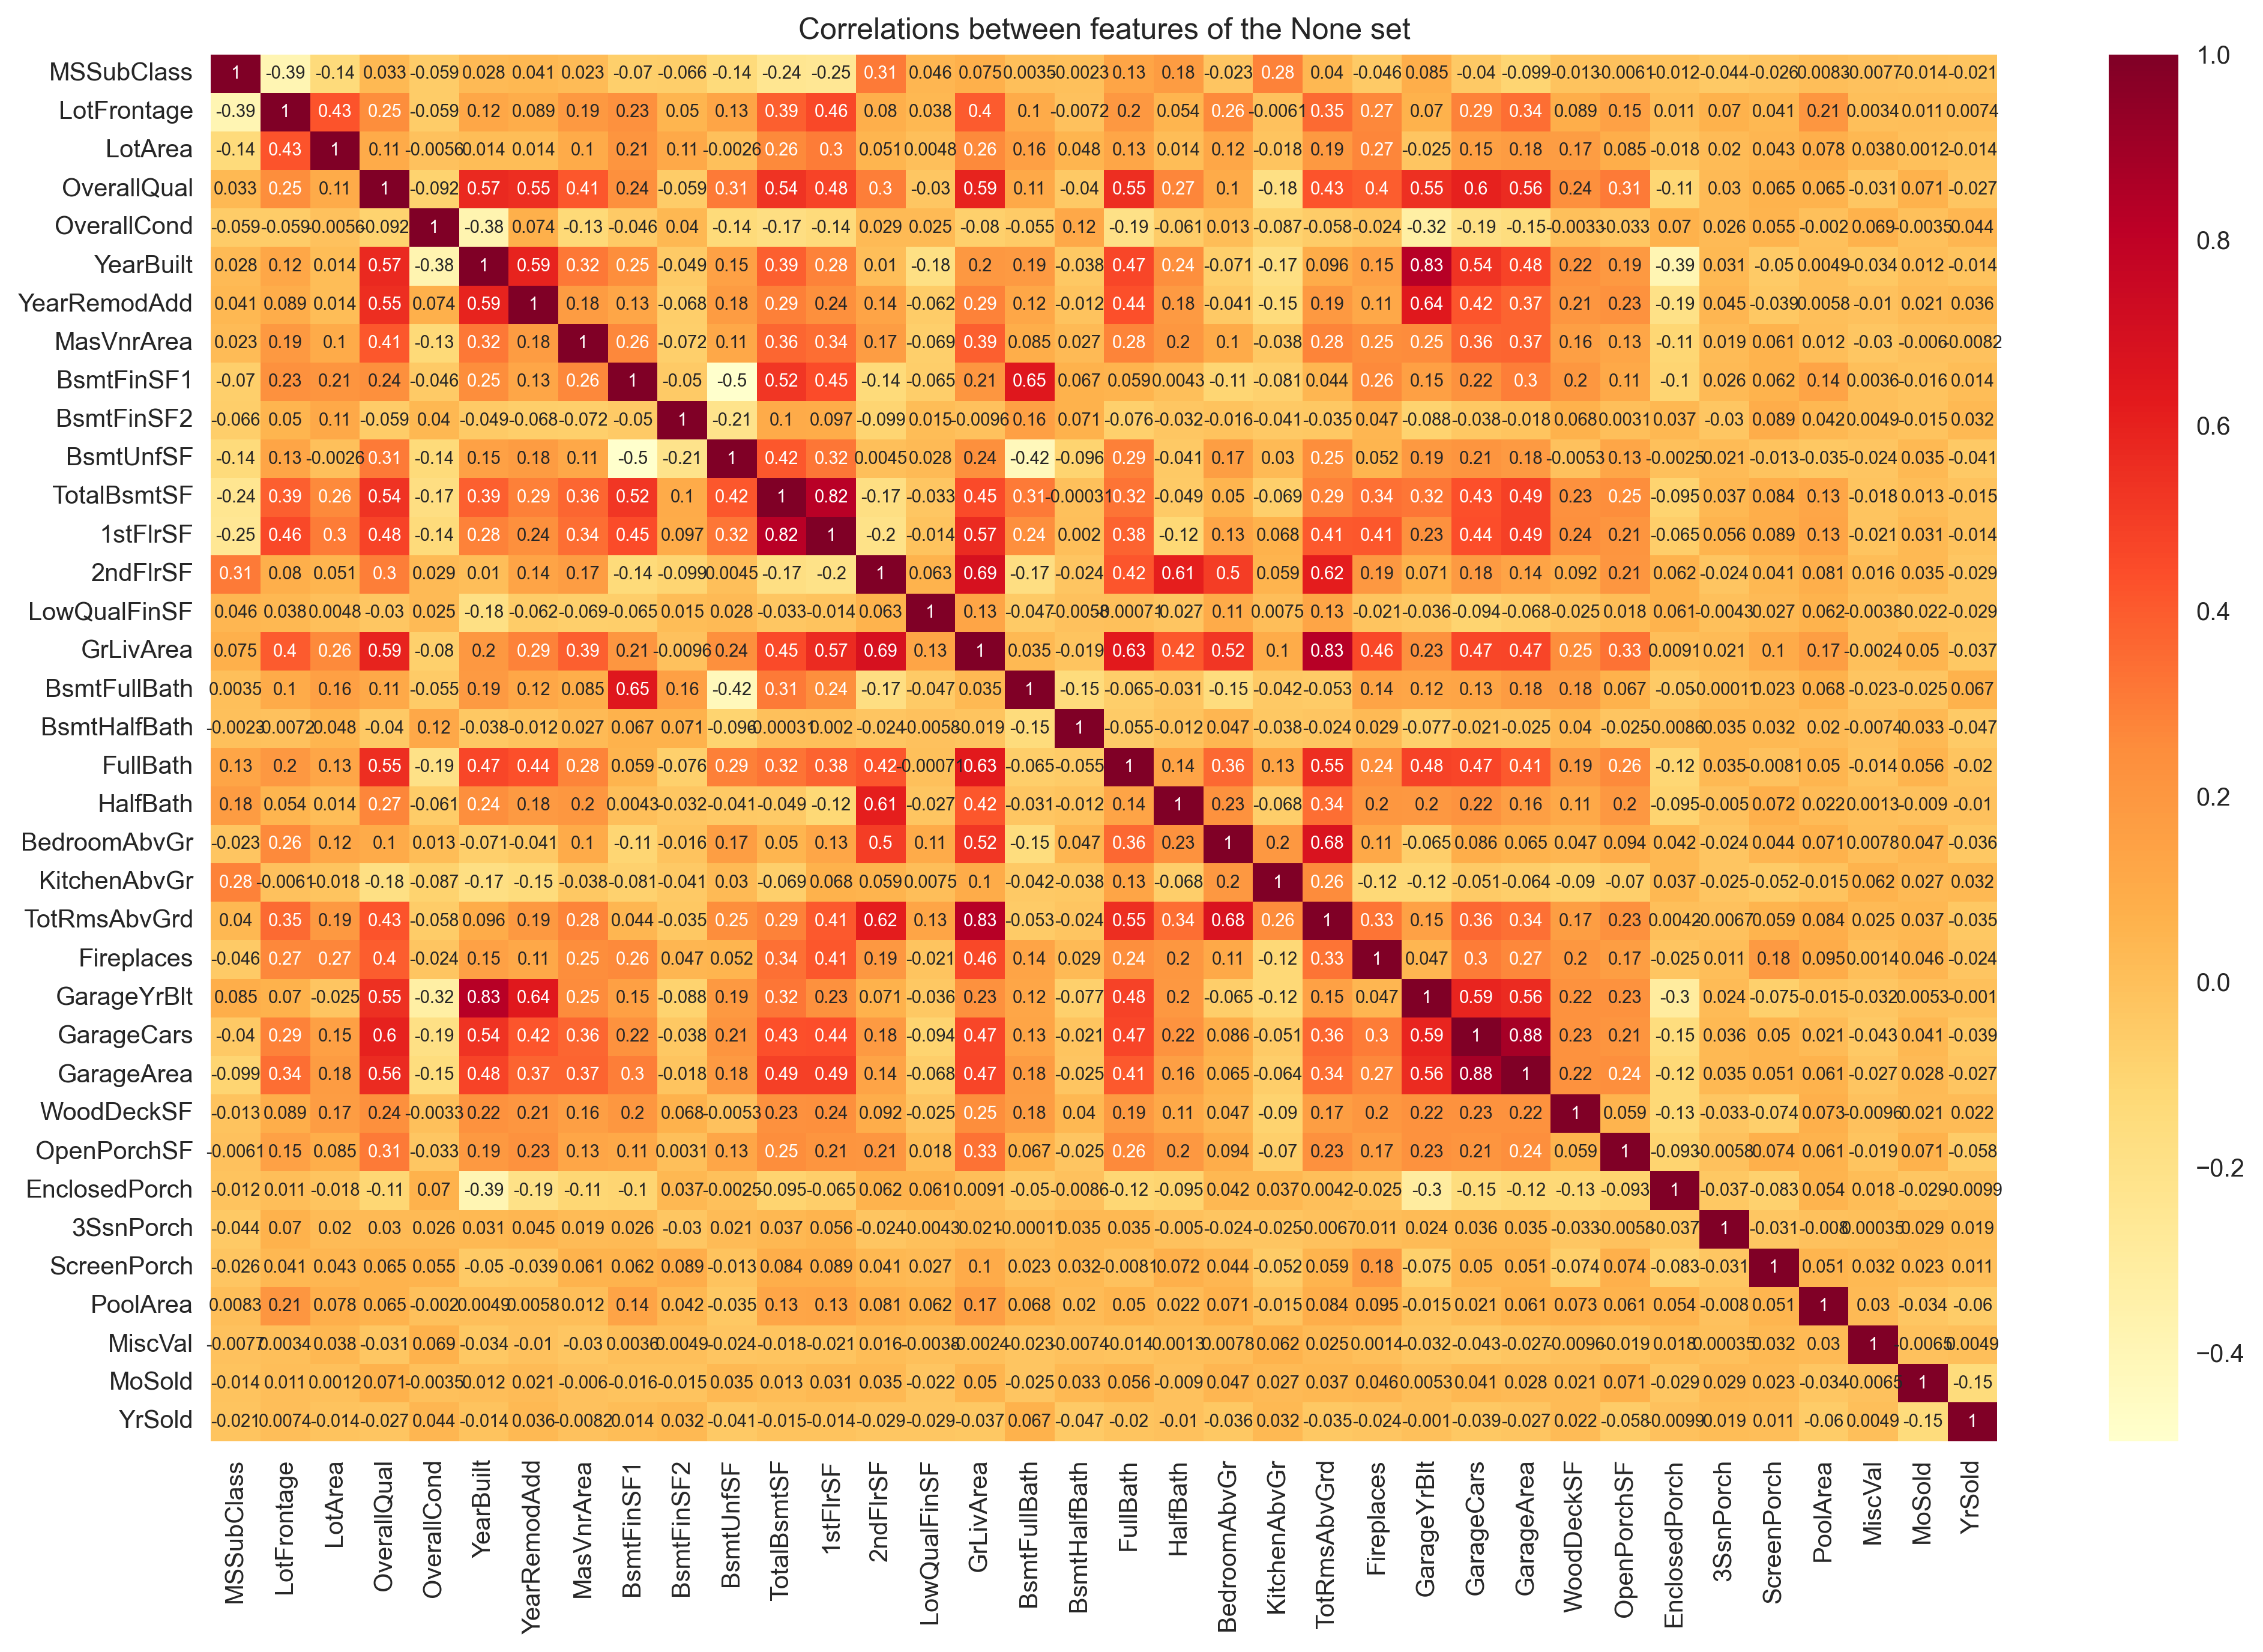

In [43]:
heatmap(numerical_features)

- From previous analysis and this heatmap, it seems that [OverallQual, GrLivArea, GarageCars, GarageArea, YearBuilt, YearRemodadd, MasVnrArea] haver greatest effect on sale price

**Feature enginnering ideas about numeric features inspired by analysis:**
- Create a new feature that combines OverallQuall & OverallCond
- Create a building age feature (YrSold - YearBuilt)
- Create a building age after being remodeled feature (YrSold - YearRemodAdd)
- Turn MSSubClass feature into a categorical feature
- Turn OverallQuall & OverallCond into categorical features (and their combined feature)
- Remove YearBuilt feature when you add building age feature and turn building age feature into a categorical feature
- Turn all features that count things present in house into categorical features

---

### elhmdullah khlsna al numeric yala nkhoush 3la category winsha'llah nshoof shwyeet insights helwa

In [44]:
categorical_features.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [45]:
categorical_features['SalePrice'] = target
def category_analyze(feature, target):
    sns.boxplot(data = categorical_features, x=feature, y=target)
    plt.show()

    analyze = pd.DataFrame(data = categorical_features.groupby(feature)[target].agg(['median','mean','count']))
    
    """ 
        how analyze dataframe is created 
        1.'categorical_features.groupby(feature)': This groups the data in the "categorical_features" DataFrame by a column specified as "feature".
        It groups the data into separate groups based on unique values in the "feature" column.
        
        2. '[target]': This selects the column named "target" from the grouped data.
        
        3 '.agg(['median', 'mean', 'count'])': This applies aggregation functions to the "target" column within each group.
        It calculates the median, mean, and count for each group.

        4. 'pd.DataFrame(data=...)': This creates a new DataFrame using the aggregated data. The "data" parameter is set to the result
            of the aggregation performed in the previous step.

        5. analyze = ...: This assigns the newly created DataFrame to the variable "analyze".
    """
    return analyze    

**MSZoning : Identifies the general zoning classification of the sale.**

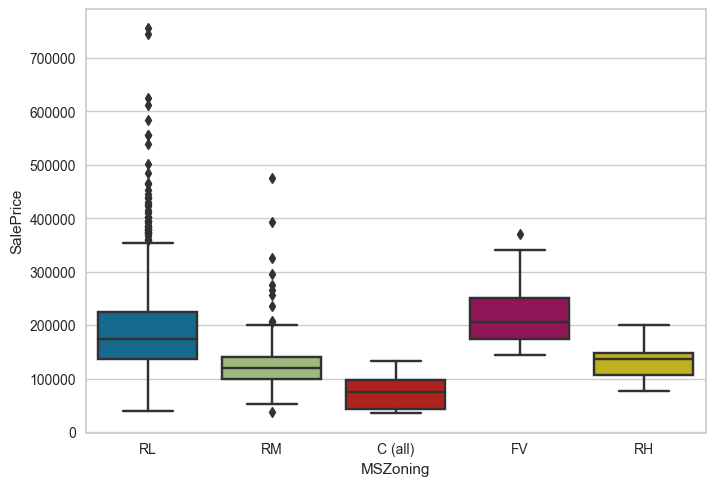

median           mean  count
MSZoning                                
C (all)    74700.0   74528.000000     10
FV        205950.0  214014.061538     65
RH        136500.0  131558.375000     16
RL        174000.0  191004.994787   1151
RM        120500.0  126316.830275    218

In [46]:
category_analyze('MSZoning', 'SalePrice')

**Street: Type of road access to property**

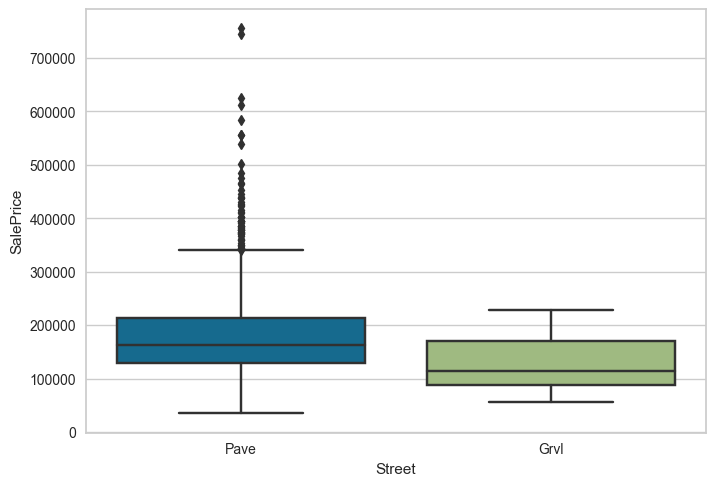

median           mean  count
Street                                
Grvl    114250.0  130190.500000      6
Pave    163000.0  181130.538514   1454

In [47]:
category_analyze('Street','SalePrice')

- price of paved streets are on average higher than gravel streets

**Alley: Type of alley access to property**
- NaN values = no alley access

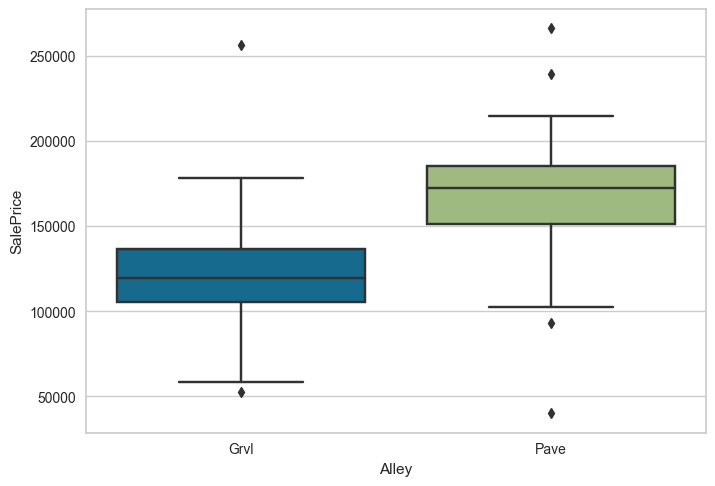

median           mean  count
Alley                                
Grvl   119500.0  122219.080000     50
Pave   172500.0  168000.585366     41

In [48]:
category_analyze('Alley','SalePrice')

- Gravel alley access houses has lowest prices compared to houses with no alley access or paved alley

**LotShape: General shape of property**

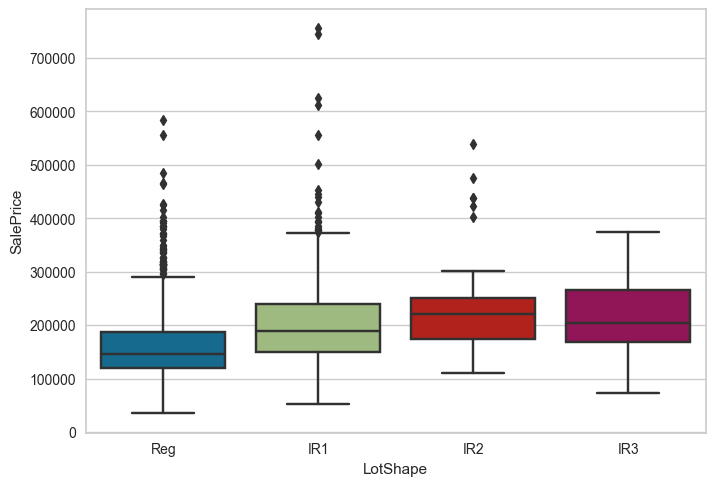

median           mean  count
LotShape                                
IR1       189000.0  206101.665289    484
IR2       221000.0  239833.365854     41
IR3       203570.0  216036.500000     10
Reg       146000.0  164754.818378    925

In [49]:
category_analyze('LotShape','SalePrice')

- Regular houses seems to be the most popular and the cheapest of the bunch, IR1 also seems to be popular with a higher average price than Regular houses

**LandContour: Flatness of the property**

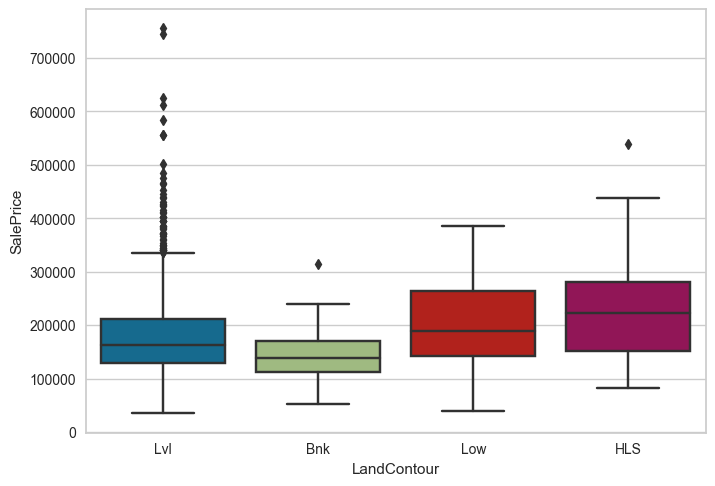

median           mean  count
LandContour                                
Bnk          139400.0  143104.079365     63
HLS          222250.0  231533.940000     50
Low          190000.0  203661.111111     36
Lvl          162900.0  180183.746758   1311

In [50]:
category_analyze('LandContour','SalePrice')

- Most of the houses are near flat/level
- It seems that Banked houses are the cheapest of the bunch

**LotConfig: Lot configuration**

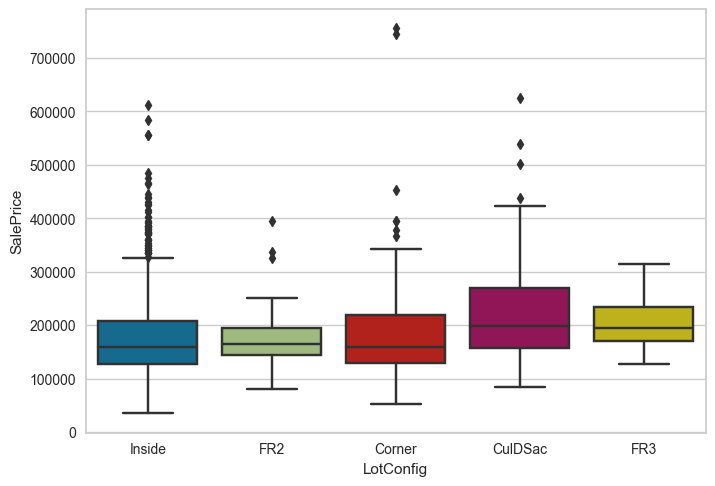

median           mean  count
LotConfig                                
Corner     160000.0  181623.425856    263
CulDSac    199262.0  223854.617021     94
FR2        165000.0  177934.574468     47
FR3        195450.0  208475.000000      4
Inside     159697.5  176938.047529   1052

In [51]:
category_analyze('LotConfig', 'SalePrice')

- Most of houses have an inside lot, that also happen to be the cheapest of the bunch on average
- Other kinds of lots appear to be higher priced

**LandSlope: Slope of property**

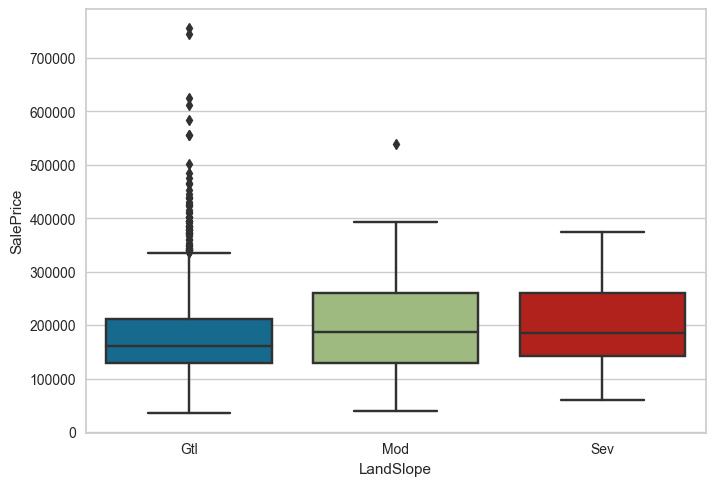

median           mean  count
LandSlope                                
Gtl        161875.0  179956.799566   1382
Mod        186700.0  196734.138462     65
Sev        185000.0  204379.230769     13

In [52]:
category_analyze('LandSlope', 'SalePrice')

- Most of houses have a gentle slope
- Severe slope is very rare

**Neighborhood: Physical locations within Ames city limits**

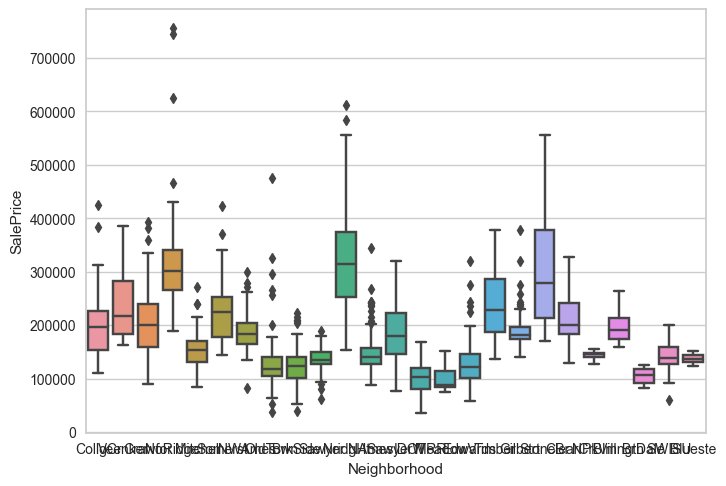

median           mean  count
Neighborhood                                
Blmngtn       191000.0  194870.882353     17
Blueste       137500.0  137500.000000      2
BrDale        106000.0  104493.750000     16
BrkSide       124300.0  124834.051724     58
ClearCr       200250.0  212565.428571     28
CollgCr       197200.0  197965.773333    150
Crawfor       200624.0  210624.725490     51
Edwards       121750.0  128219.700000    100
Gilbert       181000.0  192854.506329     79
IDOTRR        103000.0  100123.783784     37
MeadowV        88000.0   98576.470588     17
Mitchel       153500.0  156270.122449     49
NAmes         140000.0  145847.080000    225
NPkVill       146000.0  142694.444444      9
NWAmes        182900.0  189050.068493     73
NoRidge       301500.0  335295.317073     41
NridgHt       315000.0  316270.623377     77
OldTown       119000.0  128225.300885    113
SWISU         139500.0  142591.360000     25
Sawyer        135000.0  136793.135135     74
SawyerW       179900.0  186555.796610     59
Somerst       225500.0  225379.837209     86
StoneBr       278000.0  310499.000000     25
Timber        228475.0  242247.447368     38
Veenker       218000.0  238772.727273     11

In [53]:
category_analyze('Neighborhood', 'SalePrice')
# m3lsh msh 2adr agher al format bta3 alklam alt7t wakhleeh vertical y3ny 3shan ana 3aml function 3shan akhls

- Looks like every Neighbourhood is really important when it comes to determining saleprice, as each one have a different average

**Condition1: Proximity to various conditions**

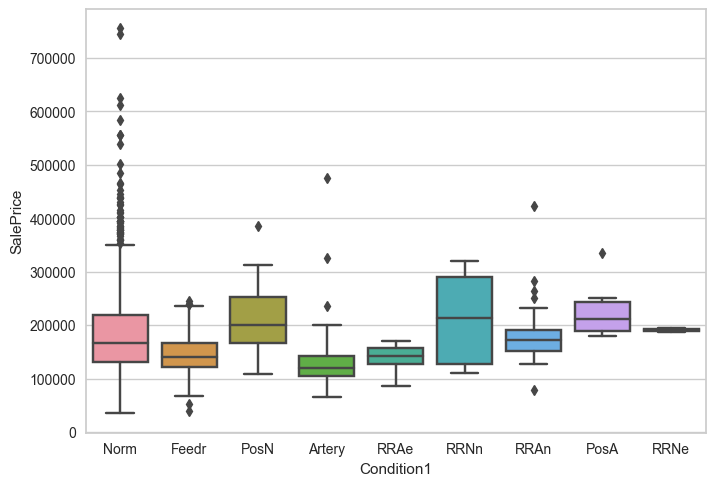

median           mean  count
Condition1                                
Artery      119550.0  135091.666667     48
Feedr       140000.0  142475.481481     81
Norm        166500.0  184495.492063   1260
PosA        212500.0  225875.000000      8
PosN        200000.0  215184.210526     19
RRAe        142500.0  138400.000000     11
RRAn        171495.0  184396.615385     26
RRNe        190750.0  190750.000000      2
RRNn        214000.0  212400.000000      5

In [54]:
category_analyze('Condition1','SalePrice')

**Condition2: Proximity to various conditions (if more than one is present)**

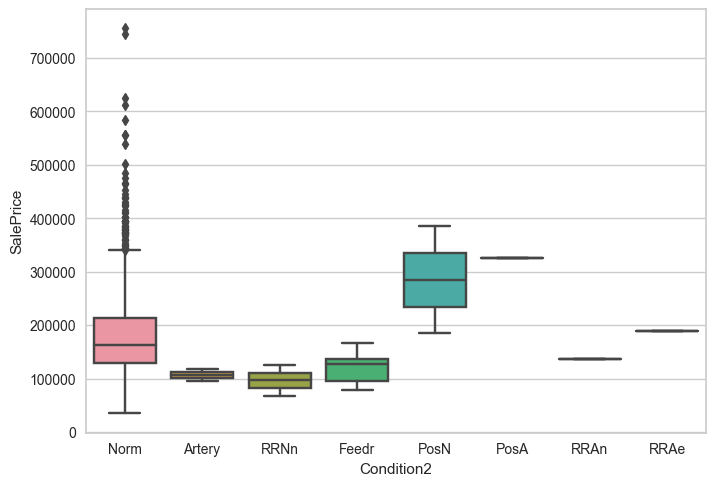

median           mean  count
Condition2                                
Artery      106500.0  106500.000000      2
Feedr       127500.0  121166.666667      6
Norm        163500.0  181169.405536   1445
PosA        325000.0  325000.000000      1
PosN        284875.0  284875.000000      2
RRAe        190000.0  190000.000000      1
RRAn        136905.0  136905.000000      1
RRNn         96750.0   96750.000000      2

In [55]:
category_analyze('Condition2','SalePrice')

**BldgType: Type of dwelling**

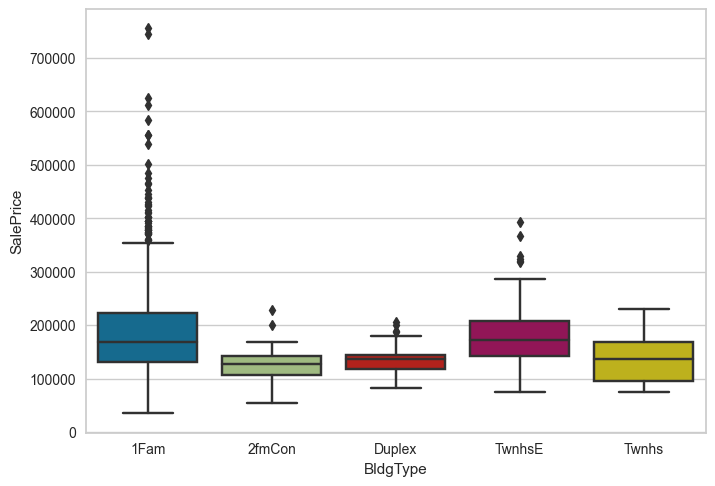

median           mean  count
BldgType                                
1Fam      167900.0  185763.807377   1220
2fmCon    127500.0  128432.258065     31
Duplex    135980.0  133541.076923     52
Twnhs     137500.0  135911.627907     43
TwnhsE    172200.0  181959.342105    114

In [56]:
category_analyze('BldgType','SalePrice')

**HouseStyle: Style of dwelling**

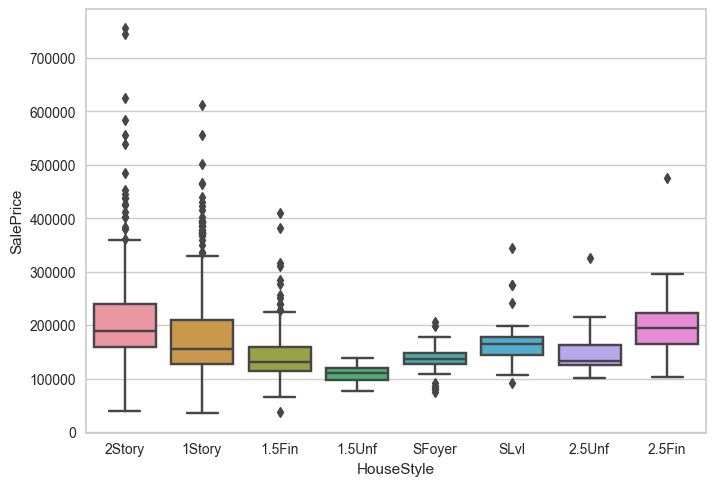

median           mean  count
HouseStyle                                
1.5Fin      132000.0  143116.740260    154
1.5Unf      111250.0  110150.000000     14
1Story      154750.0  175985.477961    726
2.5Fin      194000.0  220000.000000      8
2.5Unf      133900.0  157354.545455     11
2Story      190000.0  210051.764045    445
SFoyer      135960.0  135074.486486     37
SLvl        164500.0  166703.384615     65

In [57]:
category_analyze('HouseStyle','SalePrice')

**RoofStyle: Type of roof**

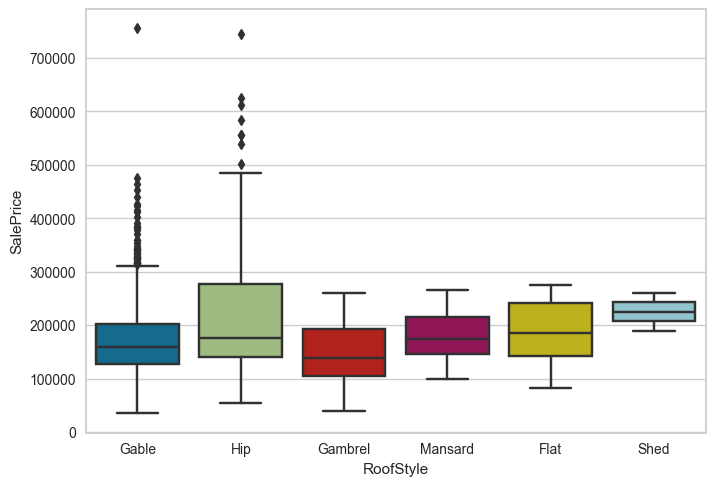

median           mean  count
RoofStyle                                
Flat       185000.0  194690.000000     13
Gable      160000.0  171483.956179   1141
Gambrel    139000.0  148909.090909     11
Hip        176500.0  218876.933566    286
Mansard    175000.0  180568.428571      7
Shed       225000.0  225000.000000      2

In [58]:
category_analyze('RoofStyle','SalePrice')

**RoofMatl: Roof material**

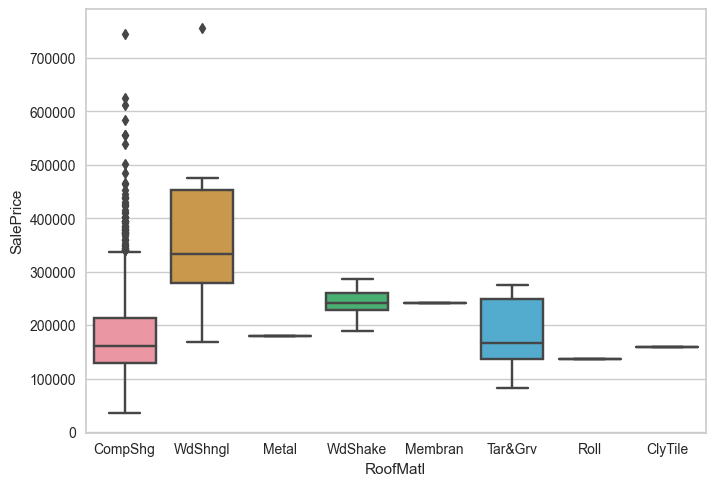

median           mean  count
RoofMatl                                
ClyTile   160000.0  160000.000000      1
CompShg   162000.0  179803.679219   1434
Membran   241500.0  241500.000000      1
Metal     180000.0  180000.000000      1
Roll      137000.0  137000.000000      1
Tar&Grv   167000.0  185406.363636     11
WdShake   242000.0  241400.000000      5
WdShngl   332500.0  390250.000000      6

In [59]:
category_analyze('RoofMatl','SalePrice')

**Exterior1st: Exterior covering on house**

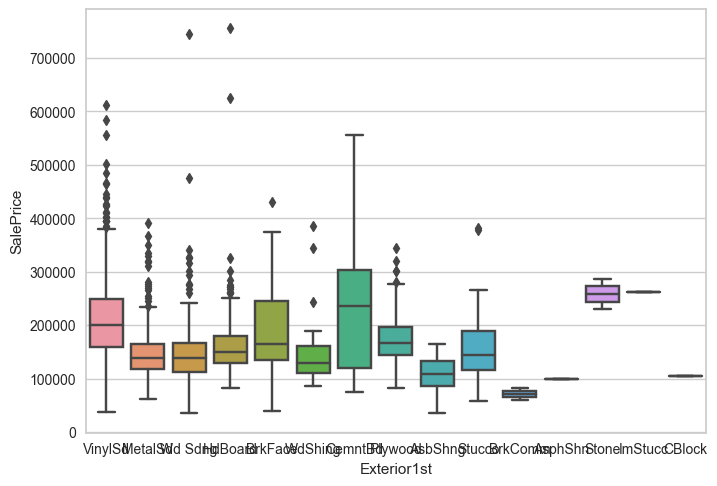

median           mean  count
Exterior1st                                
AsbShng      108000.0  107385.550000     20
AsphShn      100000.0  100000.000000      1
BrkComm       71000.0   71000.000000      2
BrkFace      165750.0  194573.000000     50
CBlock       105000.0  105000.000000      1
CemntBd      236500.0  231690.655738     61
HdBoard      149900.0  163077.450450    222
ImStucc      262000.0  262000.000000      1
MetalSd      139000.0  149422.177273    220
Plywood      167450.0  175942.379630    108
Stone        258500.0  258500.000000      2
Stucco       144000.0  162990.000000     25
VinylSd      200000.0  213732.900971    515
Wd Sdng      138943.5  149841.645631    206
WdShing      128700.0  150655.076923     26

In [60]:
category_analyze('Exterior1st','SalePrice')

**Exterior2nd: Exterior covering on house (if more than one material)**

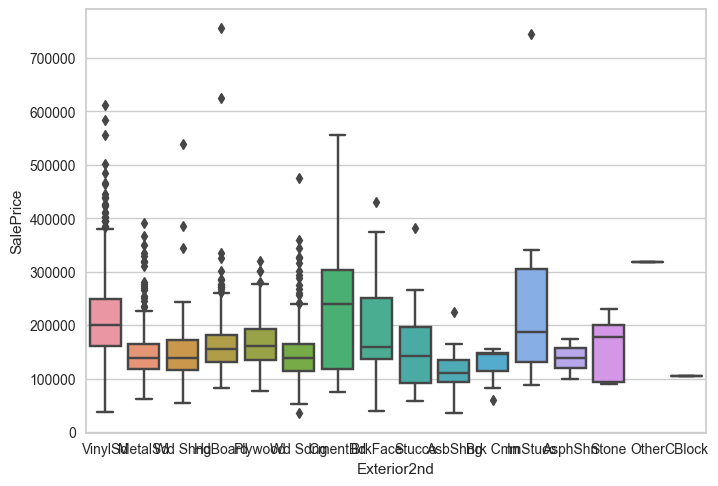

median           mean  count
Exterior2nd                                
AsbShng      111000.0  114060.550000     20
AsphShn      139000.0  138000.000000      3
Brk Cmn      147000.0  126714.285714      7
BrkFace      160000.0  195818.000000     25
CBlock       105000.0  105000.000000      1
CmentBd      238750.0  230093.833333     60
HdBoard      155000.0  167661.565217    207
ImStucc      187600.0  252070.000000     10
MetalSd      138750.0  149803.172897    214
Other        319000.0  319000.000000      1
Plywood      160750.0  168112.387324    142
Stone        177000.0  158224.800000      5
Stucco       142000.0  155905.153846     26
VinylSd      200070.5  214432.460317    504
Wd Sdng      138000.0  148386.065990    197
Wd Shng      138225.0  161328.947368     38

In [61]:
category_analyze('Exterior2nd','SalePrice')

**MasVnrType: Masonry veneer type**

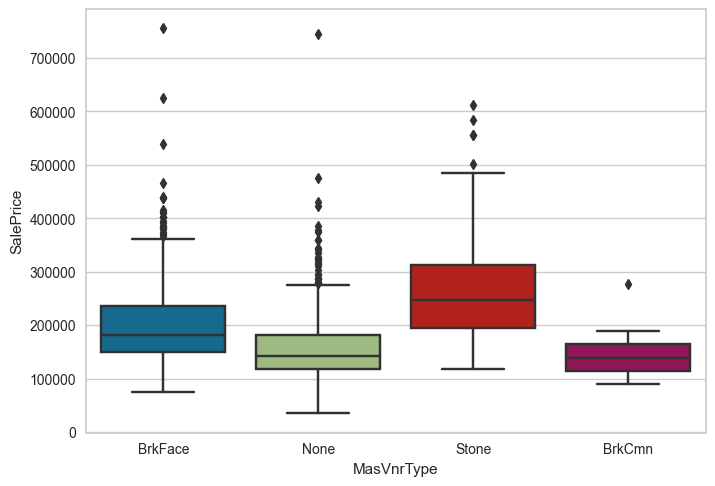

median           mean  count
MasVnrType                                
BrkCmn      139000.0  146318.066667     15
BrkFace     181000.0  204691.871910    445
None        143000.0  156221.891204    864
Stone       246839.0  265583.625000    128

In [62]:
category_analyze('MasVnrType','SalePrice')

**ExterQual: Evaluates the quality of the material on the exterior**

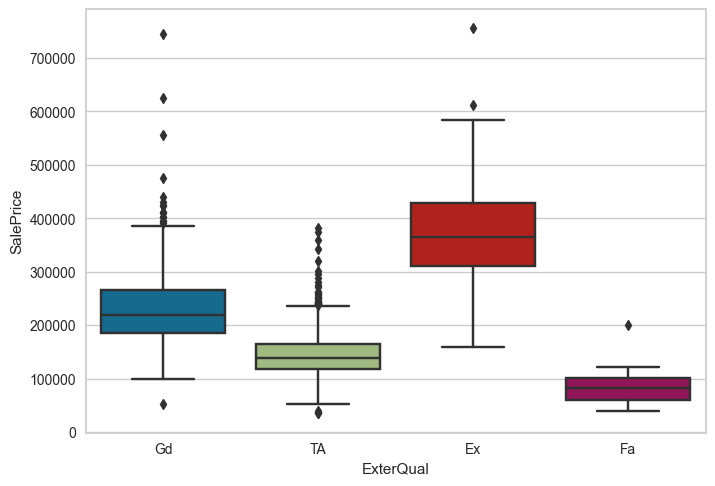

median           mean  count
ExterQual                                
Ex         364606.5  367360.961538     52
Fa          82250.0   87985.214286     14
Gd         220000.0  231633.510246    488
TA         139450.0  144341.313466    906

In [63]:
category_analyze('ExterQual','SalePrice')

**ExterCond: Evaluates the present condition of the material on the exterior**

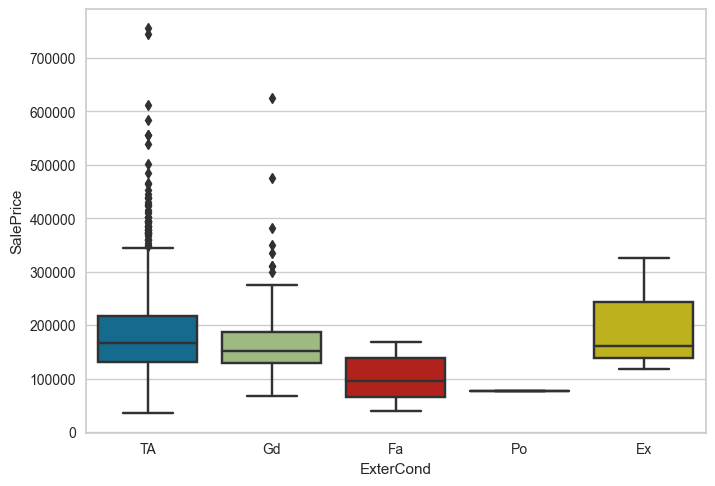

median           mean  count
ExterCond                                
Ex         161000.0  201333.333333      3
Fa          95750.0  102595.142857     28
Gd         151250.0  168897.568493    146
Po          76500.0   76500.000000      1
TA         167370.0  184034.896256   1282

In [64]:
category_analyze('ExterCond','SalePrice')

**Foundation: Type of foundation**

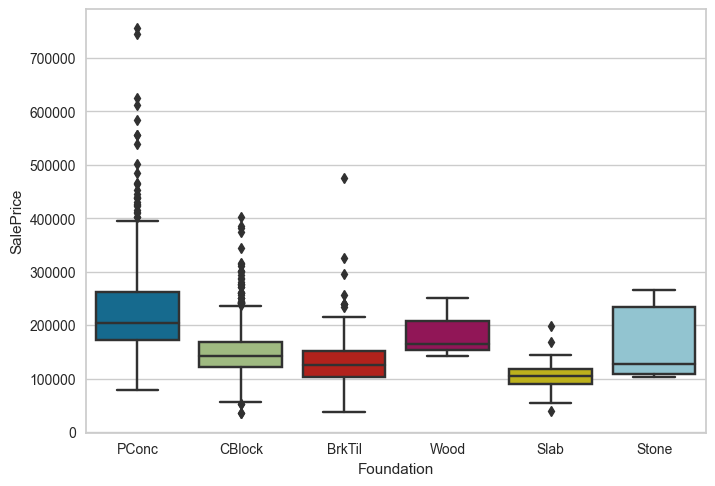

median           mean  count
Foundation                                
BrkTil      125250.0  132291.075342    146
CBlock      141500.0  149805.714511    634
PConc       205000.0  225230.442040    647
Slab        104150.0  107365.625000     24
Stone       126500.0  165959.166667      6
Wood        164000.0  185666.666667      3

In [65]:
category_analyze('Foundation','SalePrice')

**BsmtQual: Evaluates the height of the basement**

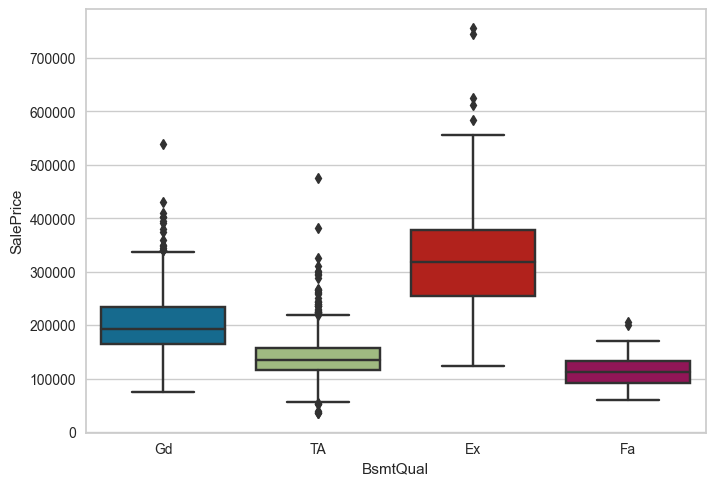

median           mean  count
BsmtQual                                
Ex        318000.0  327041.041322    121
Fa        112000.0  115692.028571     35
Gd        192070.0  202688.478964    618
TA        135500.0  140759.818182    649

In [66]:
category_analyze('BsmtQual','SalePrice')

**BsmtCond: Evaluates the general condition of the basement**

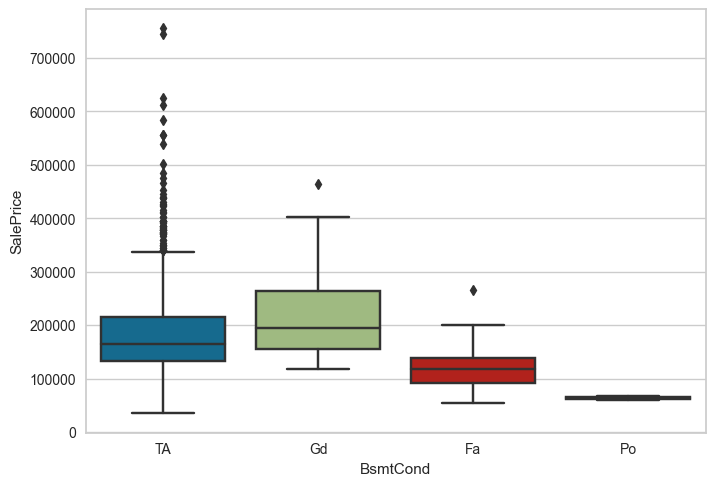

median           mean  count
BsmtCond                                
Fa        118500.0  121809.533333     45
Gd        193879.0  213599.907692     65
Po         64000.0   64000.000000      2
TA        165000.0  183632.620900   1311

In [67]:
category_analyze('BsmtCond','SalePrice')

**BsmtExposure: Refers to walkout or garden level walls**

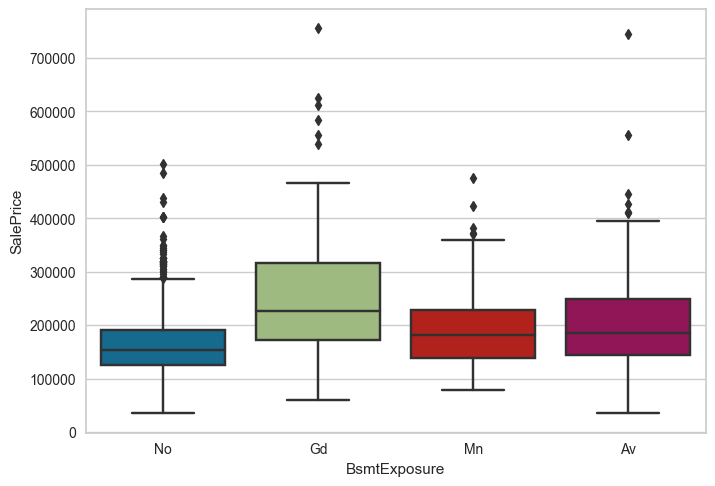

median           mean  count
BsmtExposure                                
Av            185850.0  206643.420814    221
Gd            226975.0  257689.805970    134
Mn            182450.0  192789.657895    114
No            154000.0  165652.295908    953

In [68]:
category_analyze('BsmtExposure','SalePrice')

**Heating: Type of heating**

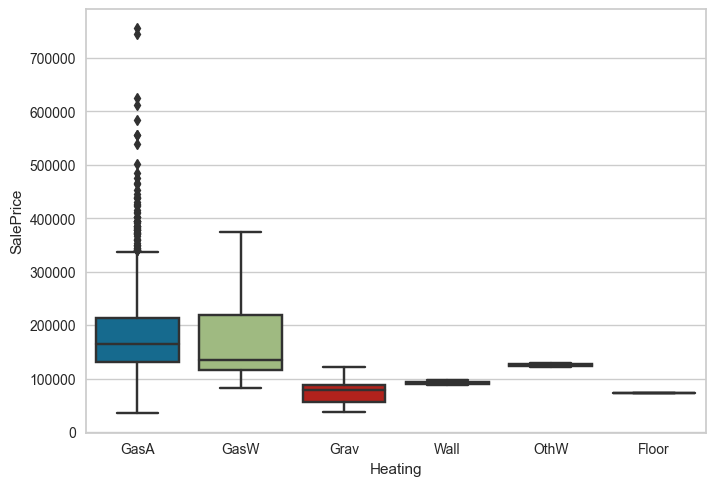

median           mean  count
Heating                                
Floor     72500.0   72500.000000      1
GasA     164500.0  182021.195378   1428
GasW     134950.0  166632.166667     18
Grav      79000.0   75271.428571      7
OthW     125750.0  125750.000000      2
Wall      91450.0   92100.000000      4

In [69]:
category_analyze('Heating','SalePrice')

**HeatingQC: Heating quality and condition**

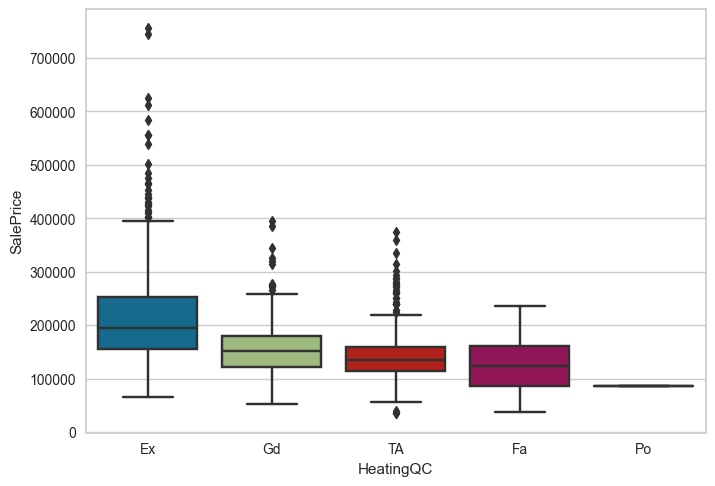

median           mean  count
HeatingQC                                
Ex         194700.0  214914.429150    741
Fa         123500.0  123919.489796     49
Gd         152000.0  156858.871369    241
Po          87000.0   87000.000000      1
TA         135000.0  142362.876168    428

In [70]:
category_analyze('HeatingQC','SalePrice')

**CentralAir: Central air conditioning**

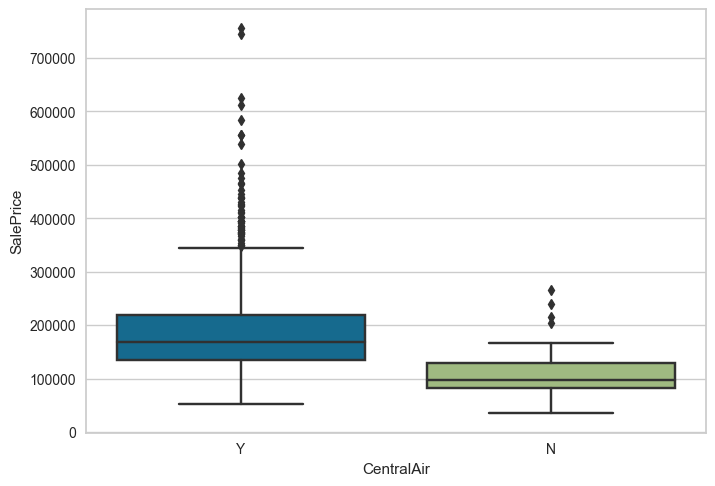

median           mean  count
CentralAir                                
N            98000.0  105264.073684     95
Y           168000.0  186186.709890   1365

In [71]:
category_analyze('CentralAir','SalePrice')

**Electrical: Electrical system**

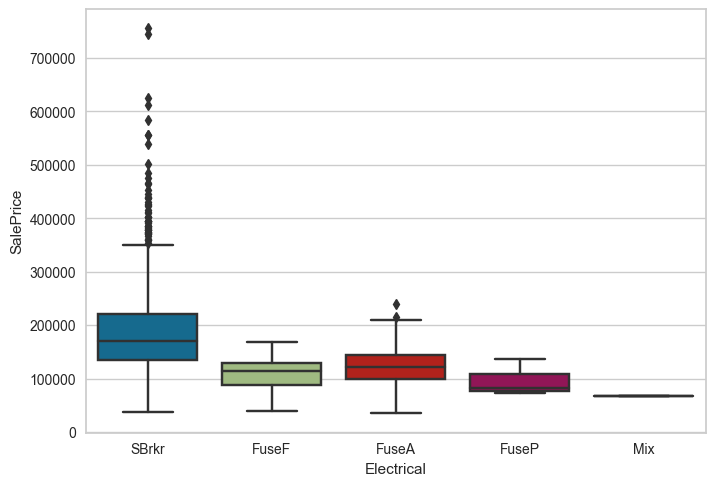

median           mean  count
Electrical                                
FuseA       121250.0  122196.893617     94
FuseF       115000.0  107675.444444     27
FuseP        82000.0   97333.333333      3
Mix          67000.0   67000.000000      1
SBrkr       170000.0  186825.113193   1334

In [72]:
category_analyze('Electrical','SalePrice')

**KitchenQual: Kitchen quality**

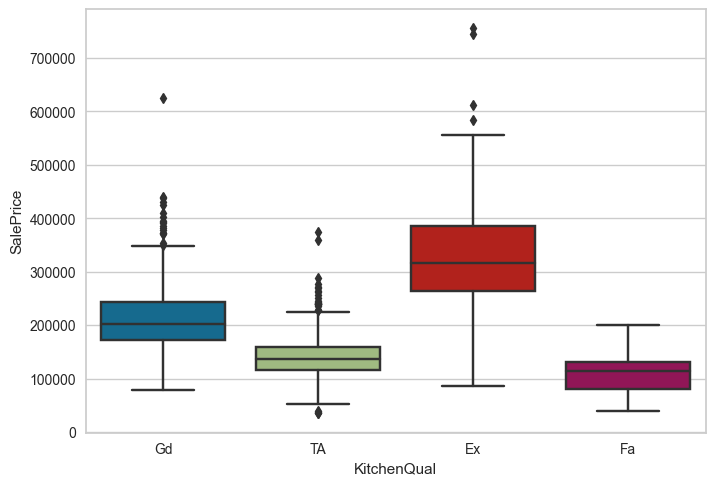

median           mean  count
KitchenQual                                
Ex           316750.0  328554.670000    100
Fa           115000.0  105565.205128     39
Gd           201400.0  212116.023891    586
TA           137000.0  139962.511565    735

In [73]:
category_analyze('KitchenQual','SalePrice')

**Functional: Home functionality (Assume typical unless deductions are warranted)**

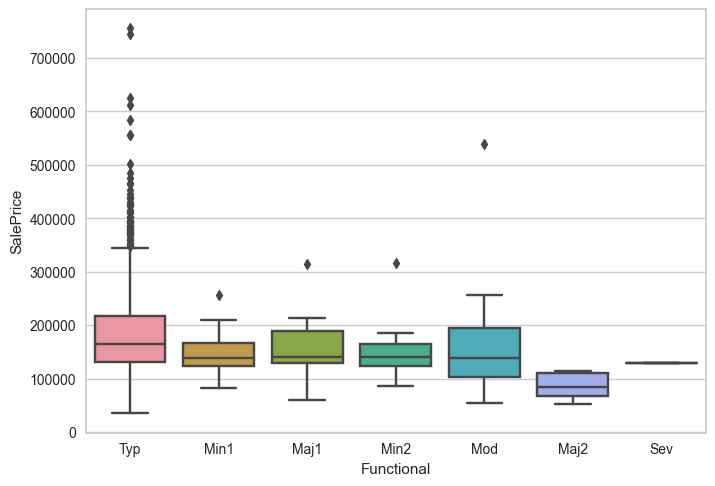

median           mean  count
Functional                                
Maj1        140750.0  153948.142857     14
Maj2         85000.0   85800.000000      5
Min1        139000.0  146385.483871     31
Min2        140000.0  144240.647059     34
Mod         137900.0  168393.333333     15
Sev         129000.0  129000.000000      1
Typ         165500.0  183429.147059   1360

In [74]:
category_analyze('Functional','SalePrice')

**FireplaceQu: Fireplace quality**

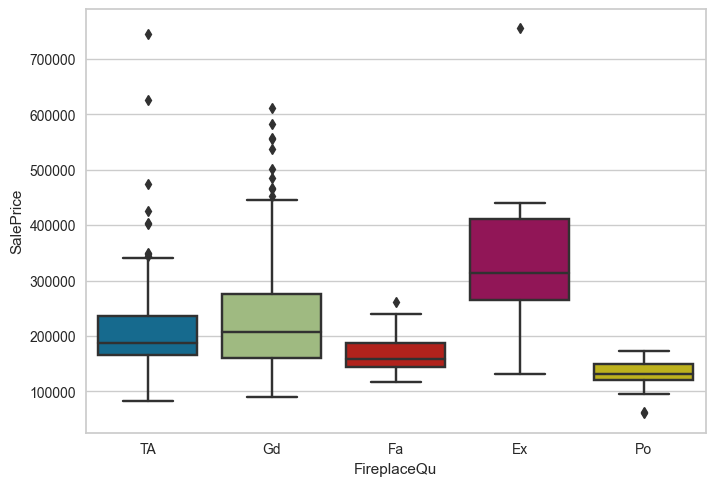

median           mean  count
FireplaceQu                                
Ex           314250.0  337712.500000     24
Fa           158000.0  167298.484848     33
Gd           206950.0  226351.415789    380
Po           131500.0  129764.150000     20
TA           187500.0  205723.488818    313

In [75]:
category_analyze('FireplaceQu','SalePrice')

**GarageType: Garage location**

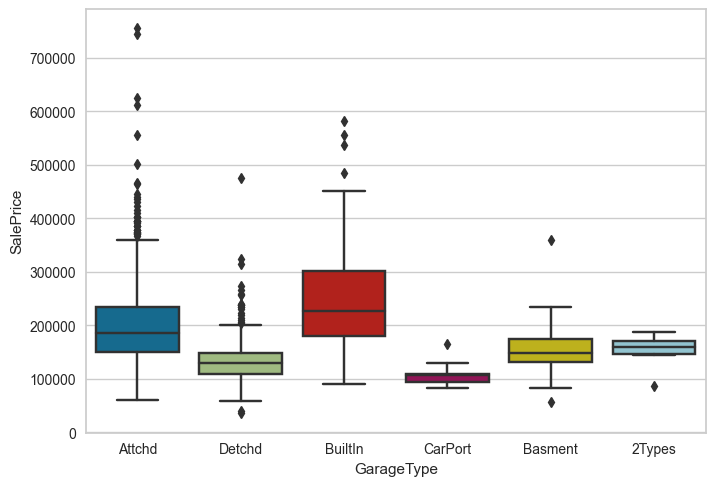

median           mean  count
GarageType                                
2Types      159000.0  151283.333333      6
Attchd      185000.0  202892.656322    870
Basment     148000.0  160570.684211     19
BuiltIn     227500.0  254751.738636     88
CarPort     108000.0  109962.111111      9
Detchd      129500.0  134091.162791    387

In [76]:
category_analyze('GarageType','SalePrice')

**GarageFinish: Interior finish of the garage**

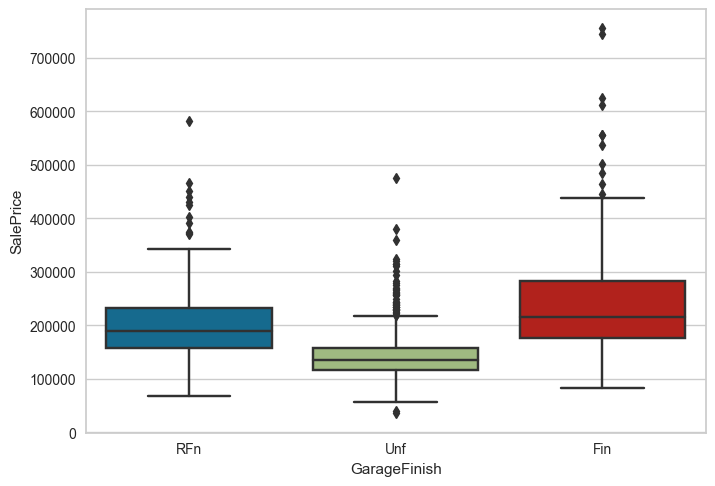

median           mean  count
GarageFinish                                
Fin           215000.0  240052.690341    352
RFn           190000.0  202068.869668    422
Unf           135000.0  142156.423140    605

In [77]:
category_analyze('GarageFinish','SalePrice')

**GarageQual: Garage quality**

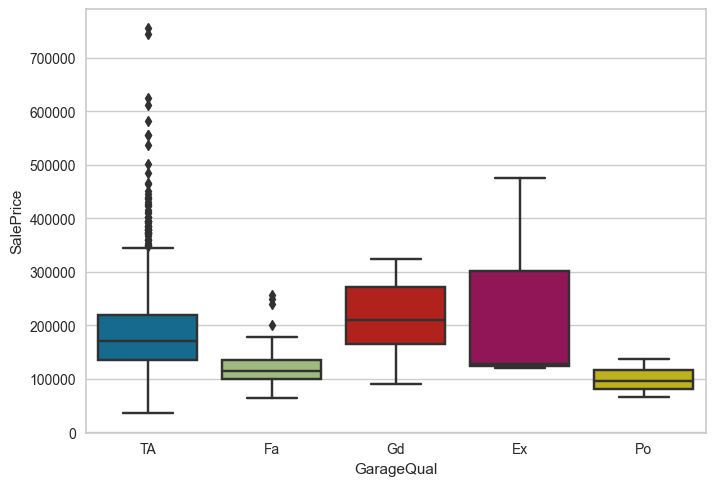

median           mean  count
GarageQual                                
Ex          127500.0  241000.000000      3
Fa          115000.0  123573.354167     48
Gd          209115.0  215860.714286     14
Po           96500.0  100166.666667      3
TA          170000.0  187489.836003   1311

In [78]:
category_analyze('GarageQual','SalePrice')

**GarageCond: Garage condition**

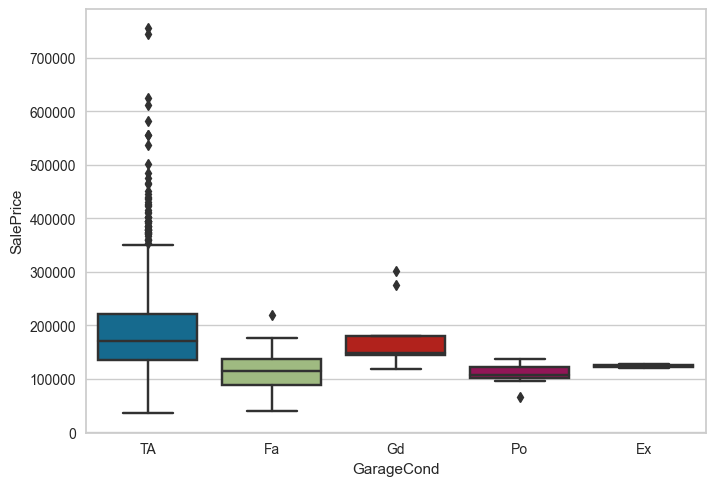

median           mean  count
GarageCond                                
Ex          124000.0  124000.000000      2
Fa          114504.0  114654.028571     35
Gd          148000.0  179930.000000      9
Po          108000.0  108500.000000      7
TA          170000.0  187885.735294   1326

In [79]:
category_analyze('GarageCond','SalePrice')

**PavedDrive: Paved driveway**

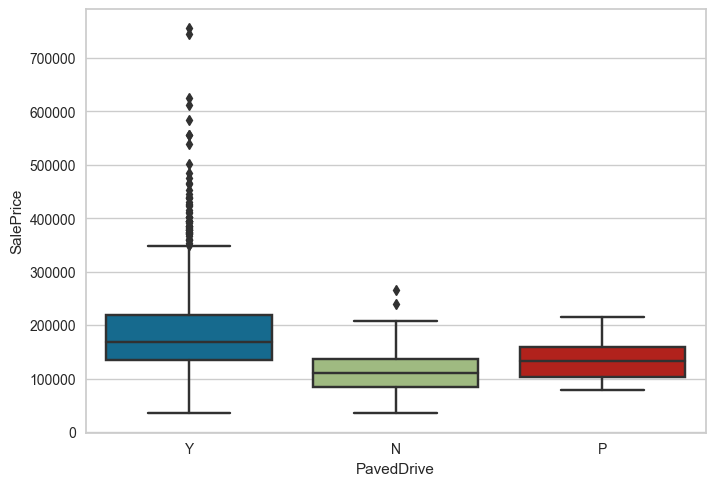

median           mean  count
PavedDrive                                
N           111000.0  115039.122222     90
P           132250.0  132330.000000     30
Y           168500.0  186433.973881   1340

In [80]:
category_analyze('PavedDrive','SalePrice')

**PoolQC: Pool quality**

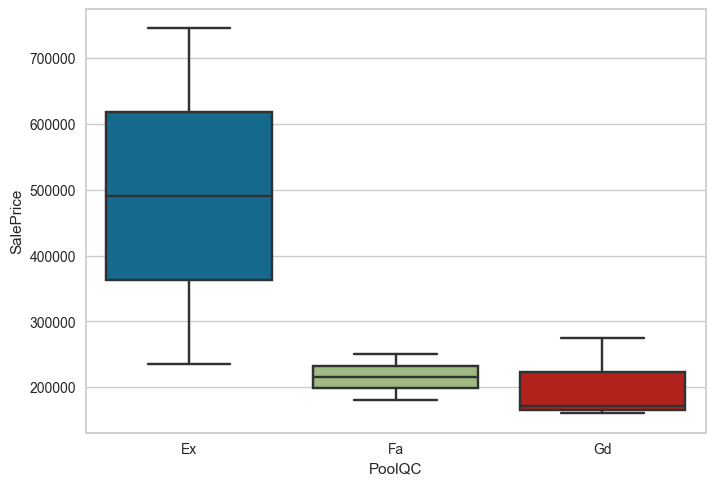

median      mean  count
PoolQC                           
Ex      490000.0  490000.0      2
Fa      215500.0  215500.0      2
Gd      171000.0  201990.0      3

In [81]:
category_analyze('PoolQC','SalePrice')

**Fence: Fence quality**

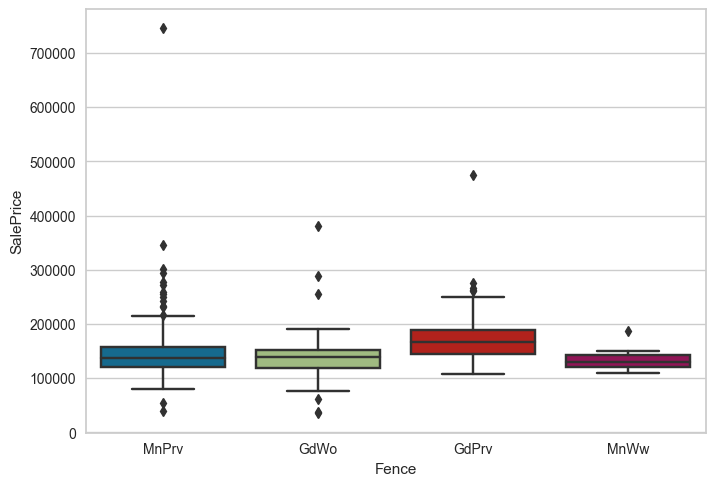

median           mean  count
Fence                                
GdPrv  167500.0  178927.457627     59
GdWo   138750.0  140379.314815     54
MnPrv  137450.0  148751.089172    157
MnWw   130000.0  134286.363636     11

In [82]:
category_analyze('Fence','SalePrice')

**MiscFeature: Miscellaneous feature not covered in other categories**

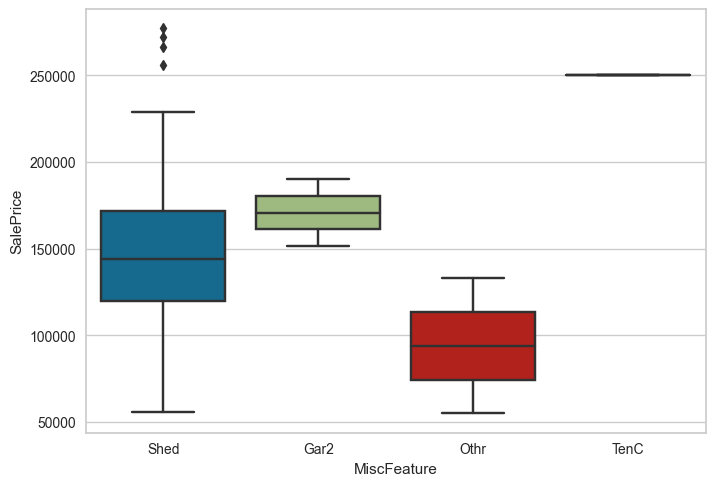

median           mean  count
MiscFeature                                
Gar2         170750.0  170750.000000      2
Othr          94000.0   94000.000000      2
Shed         144000.0  151187.612245     49
TenC         250000.0  250000.000000      1

In [83]:
category_analyze('MiscFeature','SalePrice')

**SaleType: Type of sale**

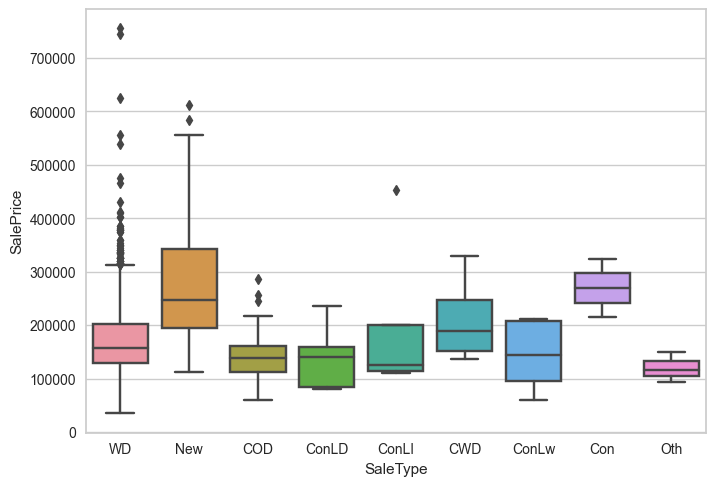

median           mean  count
SaleType                                
COD       139000.0  143973.255814     43
CWD       188750.0  210600.000000      4
Con       269600.0  269600.000000      2
ConLD     140000.0  138780.888889      9
ConLI     125000.0  200390.000000      5
ConLw     144000.0  143700.000000      5
New       247453.0  274945.418033    122
Oth       116050.0  119850.000000      3
WD        158000.0  173401.836622   1267

In [84]:
category_analyze('SaleType','SalePrice')

**SaleCondition: Condition of sale**

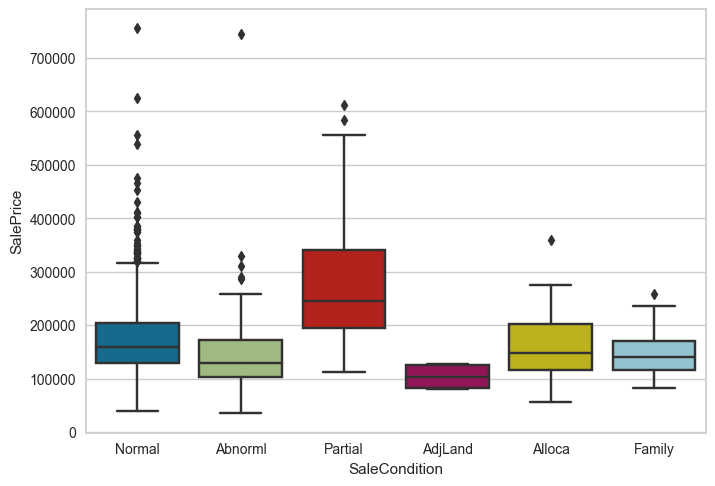

median           mean  count
SaleCondition                                
Abnorml        130000.0  146526.623762    101
AdjLand        104000.0  104125.000000      4
Alloca         148145.0  167377.416667     12
Family         140500.0  149600.000000     20
Normal         160000.0  175202.219533   1198
Partial        244600.0  272291.752000    125

In [85]:
category_analyze('SaleCondition','SalePrice')

In [86]:
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

**Feature engineering ideas about categorical features inspired from analysis:**
- Combine LotShape & LotConfig into a new feature
- Combine Condition1 & Condition2 into a new feature
- combine RoofStyle & RoofMatl into a new feature
- Combine Exterior1st, Exterior2ndm ExterQual & ExterCond intoa anew feature
- Combine BsmtQual & BsmtCond into a new feature
- Combine Heating & HeatingQC into a new feature
- Combine Heating & CentralAir into a new feature
- Combine GarageType, GarageCars & GarageArea into a new feature
- Combine SaleType & SaleCondition into a new feature

---

# Combin Train and Test Sets

In [87]:
target = train0['SalePrice'] # ana 3yzo m3aya f ana hkhzno dlw2ty 3shan h3mlo drop
test_ids = test0['Id'] # wda ana 3yzo brdo f khzno m3aya 3shan al sample sumbmissions

train1 = train0.drop(['Id', 'SalePrice'], axis=1)
test1 = test0.drop('Id', axis=1)

# tb hwa ana leeh a3ml concat, hyzwd al accuracy bt3ty wna bfill al missing data
data1 = pd.concat([train1,test1], axis=0).reset_index(drop=True)
data1

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2914         160       RM         21.0     1936   Pave   NaN      Reg   
2915         160       RM         21.0     1894   Pave   NaN      Reg   
2916          20       RL        160.0    20000   Pave   NaN      Reg   
2917          85       RL         62.0    10441   Pave   NaN      Reg   
2918          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
2914         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2915         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2916         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2917         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2918         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
2914       Norm    Twnhs     2Story            4            7       1970   
2915       Norm   TwnhsE     2Story            4            5       1970   
2916       Norm     1Fam     1Story            5            7       1960   
2917       Norm     1Fam     SFoyer            5            5       1992   
2918       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
2914          1970     Gable  CompShg     CemntBd     CmentBd       None   
2915          1970     Gable  CompShg     CemntBd     CmentBd       None   
2916          1996     Gable  CompShg     VinylSd     VinylSd       None   
2917          1992     Gable  CompShg     HdBoard     Wd Shng       None   
2918          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


# Cleaning and Missing Values

## Ensure proper Data Types

In [88]:
data1.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [89]:
data2 = data1.copy()

In [90]:
# msh 3arf leeh a7na hwlnaha l string bs insha'llah h3rf 2odam
# tmm 3rft hwlnaha object 3shan hwa koul al object category f 22dr amlahom bal mod 3la toul whya kant category b numbers
for feature in cat_feat:
    data2[feature] = data2[feature].astype(str) 

In [91]:
data2.select_dtypes(np.number)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0            65.0     8450       196.0       706.0         0.0      150.0   
1            80.0     9600         0.0       978.0         0.0      284.0   
2            68.0    11250       162.0       486.0         0.0      434.0   
3            60.0     9550         0.0       216.0         0.0      540.0   
4            84.0    14260       350.0       655.0         0.0      490.0   
...           ...      ...         ...         ...         ...        ...   
2914         21.0     1936         0.0         0.0         0.0      546.0   
2915         21.0     1894         0.0       252.0         0.0      294.0   
2916        160.0    20000         0.0      1224.0         0.0        0.0   
2917         62.0    10441         0.0       337.0         0.0      575.0   
2918         74.0     9627        94.0       758.0         0.0      238.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           856.0       856       854             0       1710           1.0   
1          1262.0      1262         0             0       1262           0.0   
2           920.0       920       866             0       1786           1.0   
3           756.0       961       756             0       1717           1.0   
4          1145.0      1145      1053             0       2198           1.0   
...           ...       ...       ...           ...        ...           ...   
2914        546.0       546       546             0       1092           0.0   
2915        546.0       546       546             0       1092           0.0   
2916       1224.0      1224         0             0       1224           1.0   
2917        912.0       970         0             0        970           0.0   
2918        996.0       996      1004             0       2000           0.0   

      BsmtHalfBath  TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  \
0              0.0             8       2003.0       548.0           0   
1              1.0             6       1976.0       460.0         298   
2              0.0             6       2001.0       608.0           0   
3              0.0             7       1998.0       642.0           0   
4              0.0             9       2000.0       836.0         192   
...            ...           ...          ...         ...         ...   
2914           0.0             5          NaN         0.0           0   
2915           0.0             6       1970.0       286.0           0   
2916           0.0             7       1960.0       576.0         474   
2917           1.0             6          NaN         0.0          80   
2918           0.0             9       1993.0       650.0         190   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  
0              61              0          0            0         0        0  
1               0              0          0            0         0        0  
2              42              0          0            0         0        0  
3              35            272          0            0         0        0  
4              84              0          0            0         0        0  
...           ...            ...        ...          ...       ...      ...  
2914            0              0          0            0         0        0  
2915           24              0          0            0         0        0  
2916            0              0          0            0         0        0  
2917           32              0          0            0         0      700  
2918           48              0          0            0         0        0  

[2919 rows x 23 columns]

## Fill Categorical Missing Values

In [92]:
# tmm 3ayz ashouf koul al object columns al 3ndhom missing values
data2.select_dtypes('object').loc[:, data2.isna().sum() > 0].columns

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [93]:
# Impute using a constant value
# da al NA feeh bykoun leeh meaning f msh hynf3 a amllah zaee msln mfeesh krasy sofra:) f msh hynf3 amla mknha hmam y3ny
for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    data2[column] = data2[column].fillna("None")
# Impute using the column mode
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    data2[column] = data2[column].fillna(data2[column].mode()[0])

In [94]:
# we have no missing values in categore colums
data2.select_dtypes('object').isna().sum().sum()

0

In [95]:
data2.select_dtypes(np.number).isna().sum().sum()

677

In [96]:
data3 = data2.copy()

## Numeric Missing Values

### Exploring Numerical Features 

In [97]:
data3.select_dtypes(np.number).loc[:, data3.isna().sum() > 0].columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageArea'],
      dtype='object')

In [98]:
def Knn_impute(df, na_target): # na_target -> column have null values
    """ 
        Take data frame and column
        return data frame with filling missing value in column
        by using Knn algorithm
    """
    df = df.copy()

    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[:,numeric_df.isna().sum() == 0].columns

    # y_train: rows that not have null values in column(na_target)
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    # X_train: columns that not have null values (non_na_column) & select from these column rows that not have null values
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    # X_test:  columns that not have null values (non_na_column) & select from these column rows that have null values
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]

    """ 
    KNN Regressor vs classifier
    The key differences are: KNN regression tries to predict the value of the output variable by using a local average.
    KNN classification attempts to predict the class to which the output variable belong by computing the local probability. 
    """
    # fa7na mstkhdmeen KneKNeighborsRegressor 3shan hya numeric value
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)

    # hna hyrg3 al perdict ll null values alna kount 3ayz amlaha
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred

    return df


In [99]:
for column in [
    'LotFrontage',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath',
    'GarageYrBlt',
    'GarageArea',
]:
    data3 = Knn_impute(data3,column)

In [100]:
data3.isna().sum().sum()

0

In [101]:
data4 = data3.copy()

# Feature Engineering

- as we said before what will do in this part msh h3eed alklam tany b2a arg3 foo2 wshoof alhgat alshofnaha

In [102]:
data4['OverallQual'] = data4['OverallQual']
data4['OverallCond'] = data4['OverallCond']
data4['OverallQual-Cond'] = data4['OverallQual'].astype(int) * data4['OverallCond'].astype(int)
data4['Age'] = (data4['YrSold'].astype(int) - data4['YearBuilt'].astype(int)).astype(str)
data4['Age'] = data4['Age']
data4['RemodAge'] = data4['YrSold'].astype(int) - data4['YearRemodAdd'].astype(int)
data4['RemodAge'] = data4['RemodAge']
data4['MSSubClass'] = data4['MSSubClass'].astype(object) 
data4['LotShape-Config'] = data4['LotShape'] + data4['LotConfig']
data4['Condition1-2'] = data4['Condition1'] + data4['Condition2']
data4['RoofStyle-Matl'] = data4['RoofStyle'] + data4['RoofMatl']
data4['Exterior1st-2nd-qual-cond'] = data4['Exterior1st'] + data4['Exterior2nd']+ data4['ExterQual'] + data4['ExterCond']
data4['BsmtQual-BsmtCond'] = data4['BsmtQual'] + data4['BsmtCond']
data4['Heating-HeatingQC'] = data4['Heating'] + data4['HeatingQC']
data4['Heating-CentralAir'] = data4['Heating'] + data4['CentralAir']
data4['SaleType-SaleCondition'] = data4['SaleType'] + data4['SaleCondition']


In [103]:
data5 = data4.copy()

# Feature Transformations

### Log Transform for Skewed Features  
- The log transformation is often used to reduce skewness of a measurement variable

In [104]:
print("Skewness: %f" % train0['SalePrice'].skew())

Skewness: 1.882876


In [105]:
# scipy.stats.skew(data5.select_dtypes(np.number))
skew_df = pd.DataFrame(data5.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data5[feature]))
skew_df['Absolute Skew'] = abs(skew_df['Skew'])
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

Feature       Skew  Absolute Skew  Skewed
0        LotFrontage   1.341483       1.341483    True
1            LotArea  12.822431      12.822431    True
2         MasVnrArea   2.603682       2.603682    True
3         BsmtFinSF1   1.425516       1.425516    True
4         BsmtFinSF2   4.146111       4.146111    True
5          BsmtUnfSF   0.919193       0.919193    True
6        TotalBsmtSF   1.162791       1.162791    True
7           1stFlrSF   1.469604       1.469604    True
8           2ndFlrSF   0.861675       0.861675    True
9       LowQualFinSF  12.088761      12.088761    True
10         GrLivArea   1.269358       1.269358    True
11      BsmtFullBath   0.624451       0.624451    True
12      BsmtHalfBath   3.931594       3.931594    True
13      TotRmsAbvGrd   0.758367       0.758367    True
14       GarageYrBlt  -0.346583       0.346583   False
15        GarageArea   0.240896       0.240896   False
16        WoodDeckSF   1.842433       1.842433    True
17       OpenPorchSF   2.535114       2.535114    True
18     EnclosedPorch   4.003891       4.003891    True
19         3SsnPorch  11.376065      11.376065    True
20       ScreenPorch   3.946694       3.946694    True
21          PoolArea  16.898328      16.898328    True
22           MiscVal  21.947195      21.947195    True
23  OverallQual-Cond   0.234995       0.234995   False
24          RemodAge   0.450226       0.450226   False

- Features before transformation

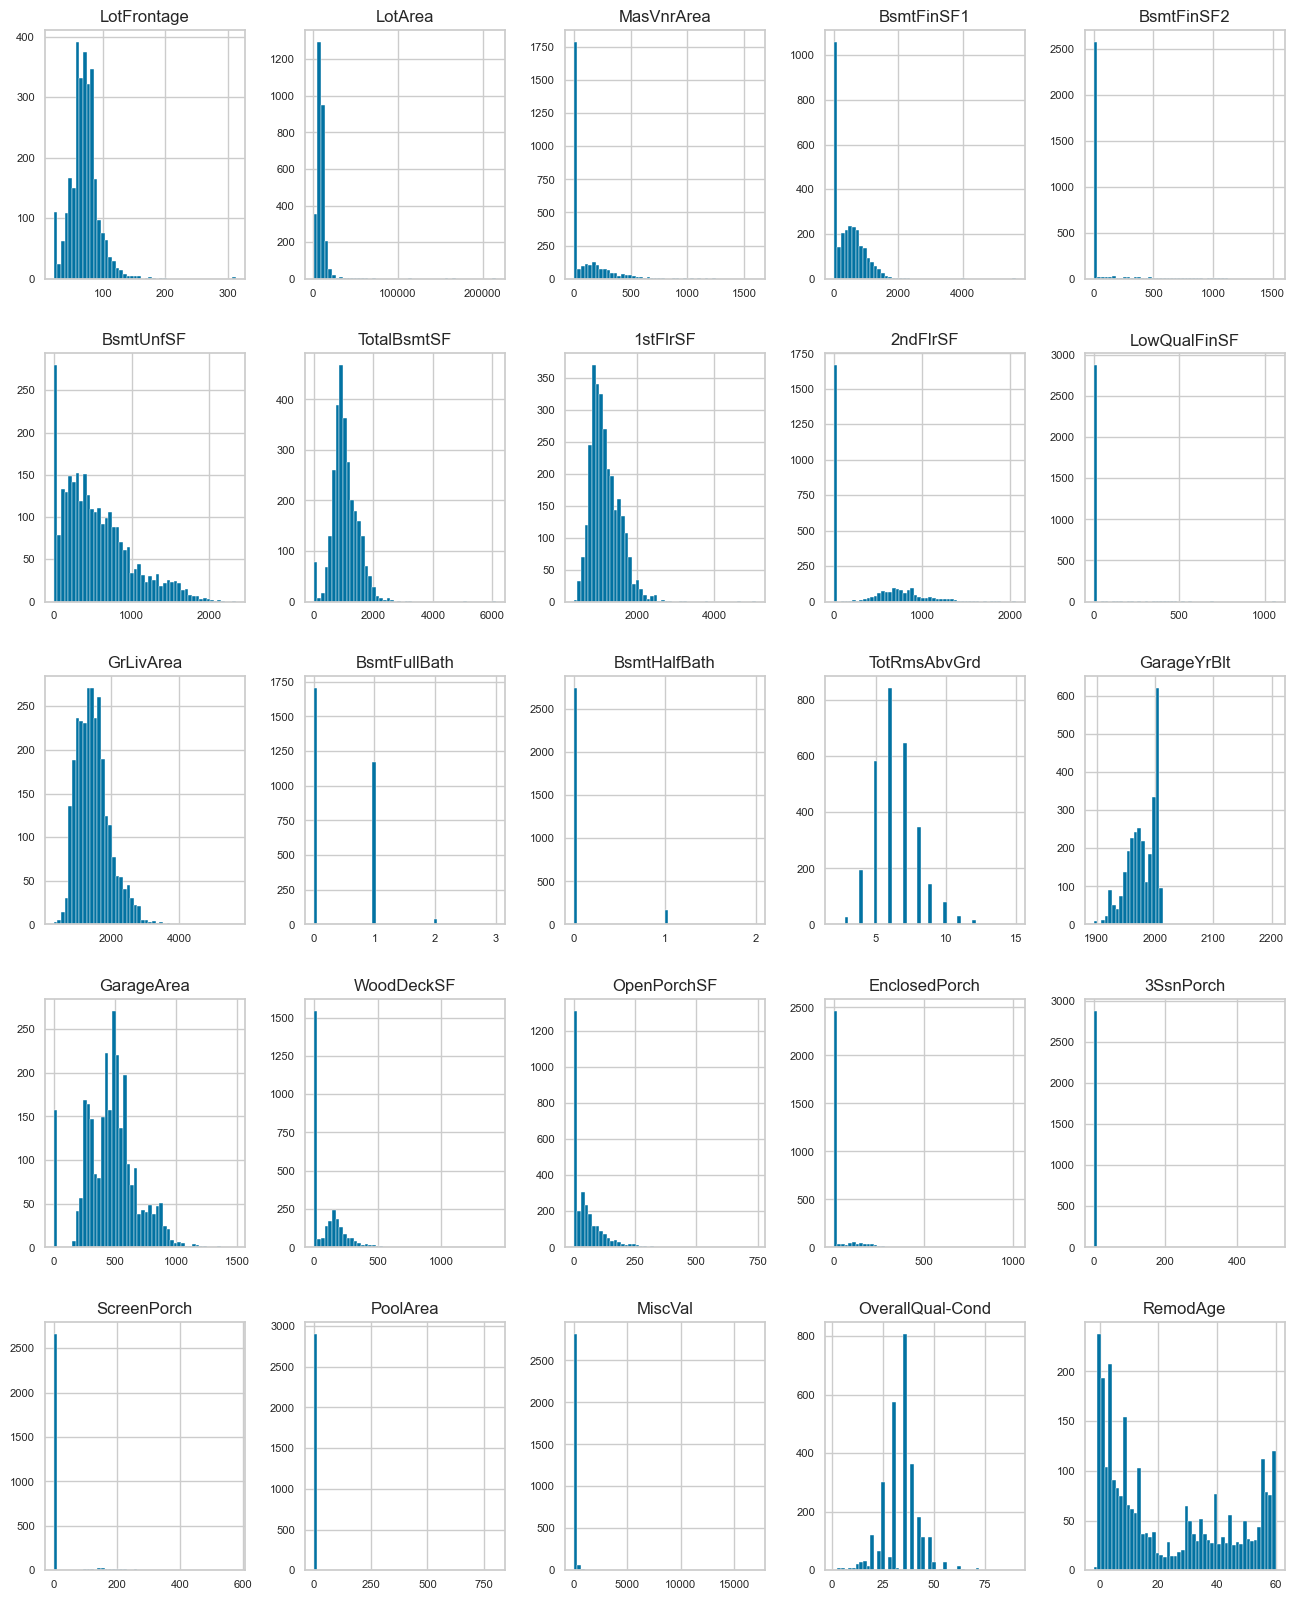

In [106]:
data5.select_dtypes(np.number).hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

In [107]:
skew_df['Skewed'].value_counts()

True     21
False     4
Name: Skewed, dtype: int64

In [108]:
data5[skew_df.query("Skewed == True")['Feature'].values].describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  2919.000000    2919.000000  2919.000000  2919.000000  2919.000000   
mean     70.151490   10168.114080   102.189654   441.332580    49.576841   
std      22.691311    7886.996359   178.934095   455.559081   169.176867   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7478.000000     0.000000     0.000000     0.000000   
50%      70.000000    9453.000000     0.000000   368.000000     0.000000   
75%      80.200000   11570.000000   164.000000   733.000000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1526.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  2919.000000  2919.000000  2919.000000  2919.000000   2919.000000   
mean    560.814046  1051.711408  1159.581706   336.483727      4.694416   
std     439.474179   440.705231   392.362079   428.701456     46.396825   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     220.000000   793.000000   876.000000     0.000000      0.000000   
50%     467.000000   989.000000  1082.000000     0.000000      0.000000   
75%     805.000000  1302.000000  1387.500000   704.000000      0.000000   
max    2336.000000  6110.000000  5095.000000  2065.000000   1064.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath  TotRmsAbvGrd   WoodDeckSF  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean   1500.759849      0.429736      0.061322      6.451524    93.709832   
std     506.051045      0.524616      0.245608      1.569379   126.526589   
min     334.000000      0.000000      0.000000      2.000000     0.000000   
25%    1126.000000      0.000000      0.000000      5.000000     0.000000   
50%    1444.000000      0.000000      0.000000      6.000000     0.000000   
75%    1743.500000      1.000000      0.000000      7.000000   168.000000   
max    5642.000000      3.000000      2.000000     15.000000  1424.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  2919.000000    2919.000000  2919.000000  2919.000000  2919.000000   
mean     47.486811      23.098321     2.602261    16.062350     2.251799   
std      67.575493      64.244246    25.188169    56.184365    35.663946   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      26.000000       0.000000     0.000000     0.000000     0.000000   
75%      70.000000       0.000000     0.000000     0.000000     0.000000   
max     742.000000    1012.000000   508.000000   576.000000   800.000000   

            MiscVal  
count   2919.000000  
mean      50.825968  
std      567.402211  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max    17000.000000

In [109]:
# shif log by 1 np.log1p()
for column in skew_df.query("Skewed == True")['Feature'].values:
    data5[column] = np.log1p(data5[column])

- After log transformation zbt al data bt3ty wkhlaha tkoun normaly distrbuted w mtwz3a zaee alfoll

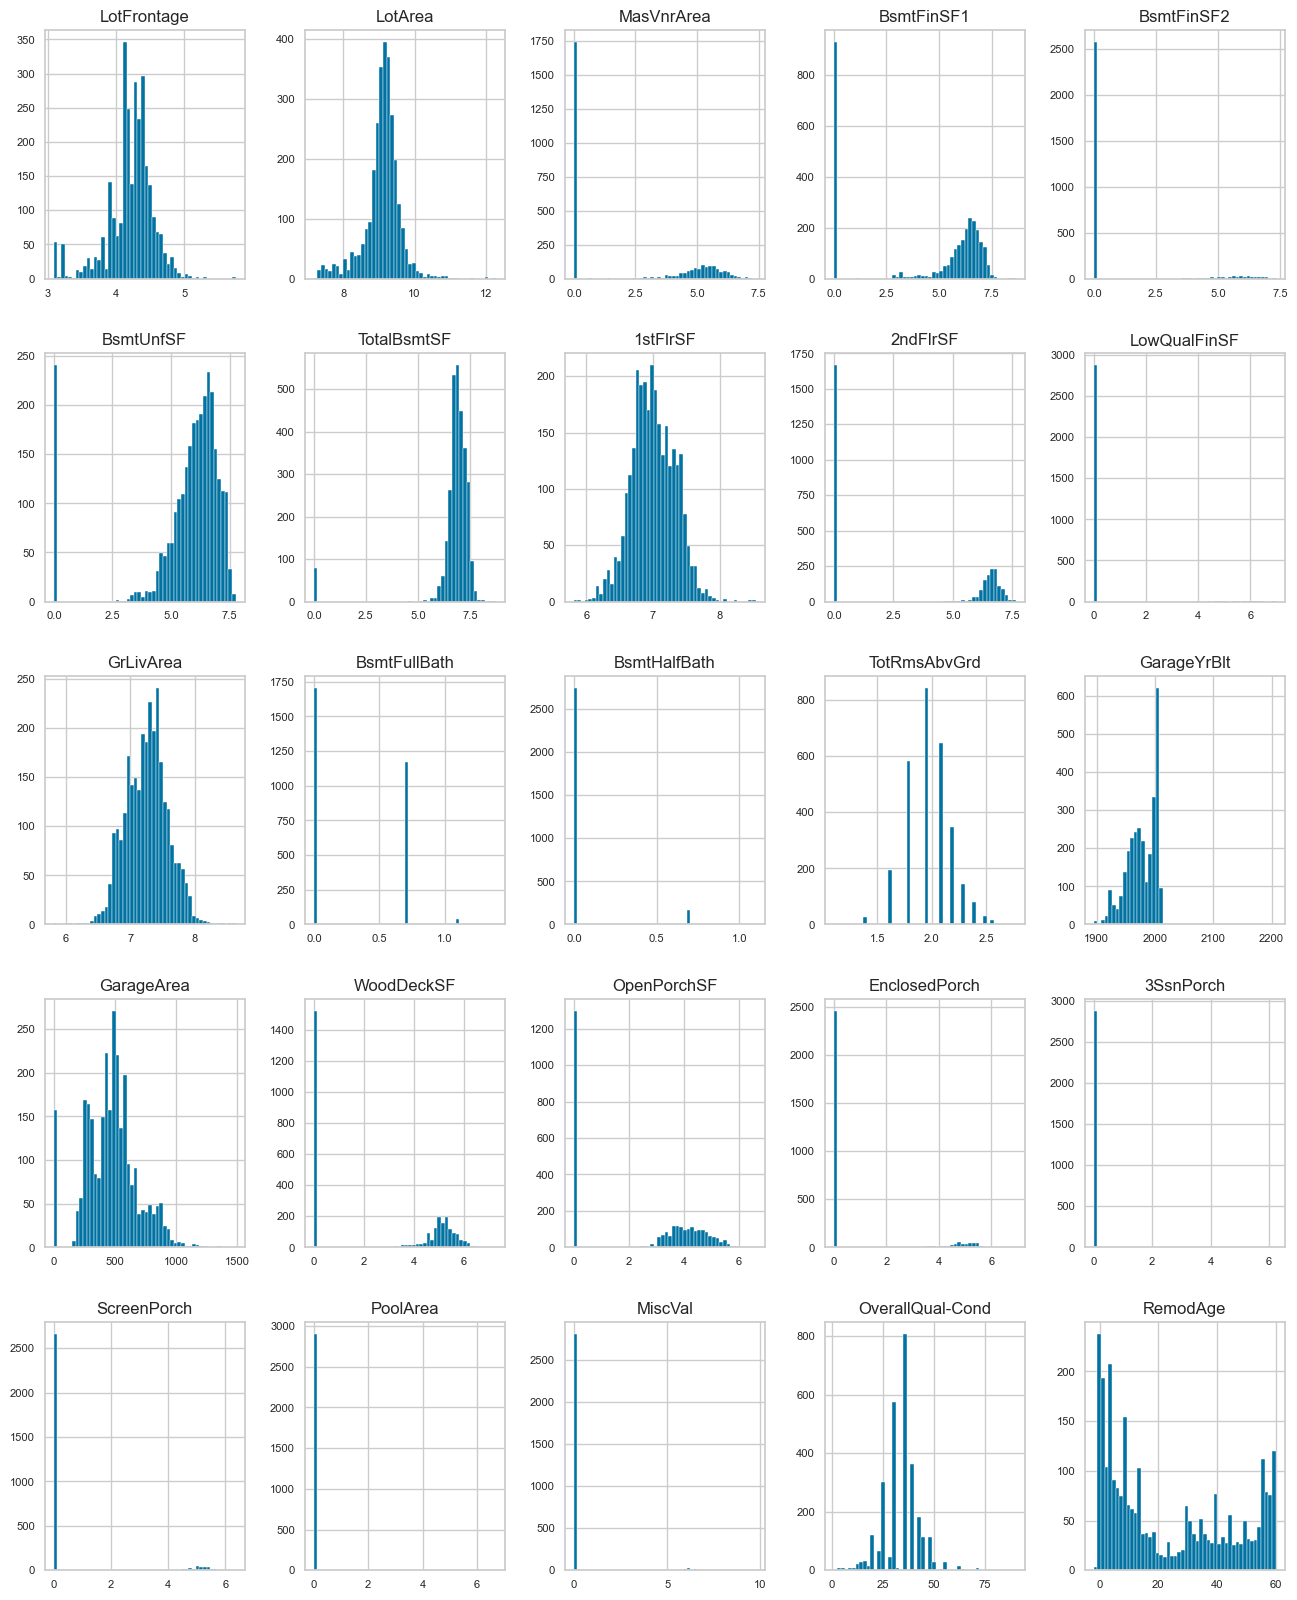

In [110]:
data5.select_dtypes(np.number).hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

In [111]:
skew_df = pd.DataFrame(data5.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data5[feature]))
skew_df['Absolute Skew'] = abs(skew_df['Skew'])
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

Feature       Skew  Absolute Skew  Skewed
0        LotFrontage  -0.930231       0.930231    True
1            LotArea  -0.504751       0.504751    True
2         MasVnrArea   0.511138       0.511138    True
3         BsmtFinSF1  -0.618036       0.618036    True
4         BsmtFinSF2   2.458996       2.458996    True
5          BsmtUnfSF  -2.159195       2.159195    True
6        TotalBsmtSF  -4.981655       4.981655    True
7           1stFlrSF   0.064828       0.064828   False
8           2ndFlrSF   0.305049       0.305049   False
9       LowQualFinSF   8.557690       8.557690    True
10         GrLivArea   0.013188       0.013188   False
11      BsmtFullBath   0.424532       0.424532   False
12      BsmtHalfBath   3.774762       3.774762    True
13      TotRmsAbvGrd   0.035107       0.035107   False
14       GarageYrBlt  -0.346583       0.346583   False
15        GarageArea   0.240896       0.240896   False
16        WoodDeckSF   0.158033       0.158033   False
17       OpenPorchSF  -0.041797       0.041797   False
18     EnclosedPorch   1.961081       1.961081    True
19         3SsnPorch   8.825256       8.825256    True
20       ScreenPorch   2.945905       2.945905    True
21          PoolArea  14.998335      14.998335    True
22           MiscVal   5.213984       5.213984    True
23  OverallQual-Cond   0.234995       0.234995   False
24          RemodAge   0.450226       0.450226   False

In [112]:
skew_df['Skewed'].value_counts() # lsa 3ndna shwyeet skeyed feature bs y3ny log transformation helwa wzbtt hgat ktera

True     14
False    11
Name: Skewed, dtype: int64

In [113]:
data4['MoSold'].unique()

array(['2', '5', '9', '12', '10', '8', '11', '4', '1', '7', '3', '6'],
      dtype=object)

### Cosine Transform for cyclical Features
- $-cos(0.5236 x)$

In [114]:
# cos transformation 0.5236 3shan akhly al one cycle mn 1 to 12 f 23dt agrb lghaeyt ml2eet al c tb2a 0.5236
data5['MoSold'] = -np.cos(0.5236 * data4['MoSold'].astype(int))
# sns.lineplot(data5,x='MoSold',y=target)
data5

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0            60       RL     4.189655  9.042040   Pave  None      Reg   
1            20       RL     4.394449  9.169623   Pave  None      Reg   
2            60       RL     4.234107  9.328212   Pave  None      IR1   
3            70       RL     4.110874  9.164401   Pave  None      IR1   
4            60       RL     4.442651  9.565284   Pave  None      IR1   
...         ...      ...          ...       ...    ...   ...      ...   
2914        160       RM     3.091042  7.568896   Pave  None      Reg   
2915        160       RM     3.091042  7.546974   Pave  None      Reg   
2916         20       RL     5.081404  9.903538   Pave  None      Reg   
2917         85       RL     4.143135  9.253591   Pave  None      Reg   
2918         60       RL     4.317488  9.172431   Pave  None      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
2914         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2915         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2916         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2917         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2918         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle OverallQual OverallCond YearBuilt  \
0          Norm     1Fam     2Story           7           5      2003   
1          Norm     1Fam     1Story           6           8      1976   
2          Norm     1Fam     2Story           7           5      2001   
3          Norm     1Fam     2Story           7           5      1915   
4          Norm     1Fam     2Story           8           5      2000   
...         ...      ...        ...         ...         ...       ...   
2914       Norm    Twnhs     2Story           4           7      1970   
2915       Norm   TwnhsE     2Story           4           5      1970   
2916       Norm     1Fam     1Story           5           7      1960   
2917       Norm     1Fam     SFoyer           5           5      1992   
2918       Norm     1Fam     2Story           7           5      1993   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            1976     Gable  CompShg     MetalSd     MetalSd       None   
2            2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4            2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...           ...       ...      ...         ...         ...        ...   
2914         1970     Gable  CompShg     CemntBd     CmentBd       None   
2915         1970     Gable  CompShg     CemntBd     CmentBd       None   
2916         1996     Gable  CompShg     VinylSd     VinylSd       None   
2917         1992     Gable  CompShg     HdBoard     Wd Shng       None   
2918         1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       5.283204        Gd        TA      PConc       Gd       TA   
1       0.000000        TA        TA     CBlock       Gd       TA   
2       5.093750        Gd        TA      PConc       Gd       TA   
3       0.000000        TA        TA     BrkTil       TA       Gd   
4       5.860786        Gd        TA      PConc       Gd       TA   
...          ...       ...       ...        ...

In [115]:
data6 = data5.copy()

## Encode Categoricals

In [116]:
data6 = pd.get_dummies(data6) # one hot encodeing 
data6

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0        4.189655  9.042040    5.283204    6.561031         0.0   5.017280   
1        4.394449  9.169623    0.000000    6.886532         0.0   5.652489   
2        4.234107  9.328212    5.093750    6.188264         0.0   6.075346   
3        4.110874  9.164401    0.000000    5.379897         0.0   6.293419   
4        4.442651  9.565284    5.860786    6.486161         0.0   6.196444   
...           ...       ...         ...         ...         ...        ...   
2914     3.091042  7.568896    0.000000    0.000000         0.0   6.304449   
2915     3.091042  7.546974    0.000000    5.533389         0.0   5.686975   
2916     5.081404  9.903538    0.000000    7.110696         0.0   0.000000   
2917     4.143135  9.253591    0.000000    5.823046         0.0   6.356108   
2918     4.317488  9.172431    4.553877    6.632002         0.0   5.476464   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        6.753438  6.753438  6.751101           0.0   7.444833      0.693147   
1        7.141245  7.141245  0.000000           0.0   7.141245      0.000000   
2        6.825460  6.825460  6.765039           0.0   7.488294      0.693147   
3        6.629363  6.869014  6.629363           0.0   7.448916      0.693147   
4        7.044033  7.044033  6.960348           0.0   7.695758      0.693147   
...           ...       ...       ...           ...        ...           ...   
2914     6.304449  6.304449  6.304449           0.0   6.996681      0.000000   
2915     6.304449  6.304449  6.304449           0.0   6.996681      0.000000   
2916     7.110696  7.110696  0.000000           0.0   7.110696      0.693147   
2917     6.816736  6.878326  0.000000           0.0   6.878326      0.000000   
2918     6.904751  6.904751  6.912743           0.0   7.601402      0.000000   

      BsmtHalfBath  TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  \
0         0.000000      2.197225       2003.0       548.0    0.000000   
1         0.693147      1.945910       1976.0       460.0    5.700444   
2         0.000000      1.945910       2001.0       608.0    0.000000   
3         0.000000      2.079442       1998.0       642.0    0.000000   
4         0.000000      2.302585       2000.0       836.0    5.262690   
...            ...           ...          ...         ...         ...   
2914      0.000000      1.791759       1973.8         0.0    0.000000   
2915      0.000000      1.945910       1970.0       286.0    0.000000   
2916      0.000000      2.079442       1960.0       576.0    6.163315   
2917      0.693147      1.945910       1966.2         0.0    4.394449   
2918      0.000000      2.302585       1993.0       650.0    5.252273   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
0        4.127134       0.000000        0.0          0.0       0.0  0.000000   
1        0.000000       0.000000        0.0          0.0       0.0  0.000000   
2        3.761200       0.000000        0.0          0.0       0.0  0.000000   
3        3.583519       5.609472        0.0          0.0       0.0  0.000000   
4        4.442651       0.000000        0.0          0.0       0.0  0.000000   
...           ...            ...        ...          ...       ...       ...   
2914     0.000000       0.000000        0.0          0.0       0.0  0.000000   
2915     3.218876       0.000000        0.0          0.0       0.0  0.000000   
2916     0.000000       0.000000        0.0          0.0       0.0  0.000000   
2917     3.496508       0.000000        0.0          0.0       0.0  6.552508   
2918     3.891820       0.000000        0.0          0.0       0.0  0.000000   

        MoSold  OverallQual-Cond  RemodAge  MSSubClass_120  MSSubClass_150  \
0    -0.499998                35         5               0               0   
1     0.866028                48        31               0               0   
2    -0.000011                35    

In [117]:
data7 = data6.copy()

### Scaling

In [118]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
scaler.fit(data7)

data6 = pd.DataFrame(scaler.transform(data7), index=data6.index, columns=data6.columns)

In [119]:
data7

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0        4.189655  9.042040    5.283204    6.561031         0.0   5.017280   
1        4.394449  9.169623    0.000000    6.886532         0.0   5.652489   
2        4.234107  9.328212    5.093750    6.188264         0.0   6.075346   
3        4.110874  9.164401    0.000000    5.379897         0.0   6.293419   
4        4.442651  9.565284    5.860786    6.486161         0.0   6.196444   
...           ...       ...         ...         ...         ...        ...   
2914     3.091042  7.568896    0.000000    0.000000         0.0   6.304449   
2915     3.091042  7.546974    0.000000    5.533389         0.0   5.686975   
2916     5.081404  9.903538    0.000000    7.110696         0.0   0.000000   
2917     4.143135  9.253591    0.000000    5.823046         0.0   6.356108   
2918     4.317488  9.172431    4.553877    6.632002         0.0   5.476464   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        6.753438  6.753438  6.751101           0.0   7.444833      0.693147   
1        7.141245  7.141245  0.000000           0.0   7.141245      0.000000   
2        6.825460  6.825460  6.765039           0.0   7.488294      0.693147   
3        6.629363  6.869014  6.629363           0.0   7.448916      0.693147   
4        7.044033  7.044033  6.960348           0.0   7.695758      0.693147   
...           ...       ...       ...           ...        ...           ...   
2914     6.304449  6.304449  6.304449           0.0   6.996681      0.000000   
2915     6.304449  6.304449  6.304449           0.0   6.996681      0.000000   
2916     7.110696  7.110696  0.000000           0.0   7.110696      0.693147   
2917     6.816736  6.878326  0.000000           0.0   6.878326      0.000000   
2918     6.904751  6.904751  6.912743           0.0   7.601402      0.000000   

      BsmtHalfBath  TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  \
0         0.000000      2.197225       2003.0       548.0    0.000000   
1         0.693147      1.945910       1976.0       460.0    5.700444   
2         0.000000      1.945910       2001.0       608.0    0.000000   
3         0.000000      2.079442       1998.0       642.0    0.000000   
4         0.000000      2.302585       2000.0       836.0    5.262690   
...            ...           ...          ...         ...         ...   
2914      0.000000      1.791759       1973.8         0.0    0.000000   
2915      0.000000      1.945910       1970.0       286.0    0.000000   
2916      0.000000      2.079442       1960.0       576.0    6.163315   
2917      0.693147      1.945910       1966.2         0.0    4.394449   
2918      0.000000      2.302585       1993.0       650.0    5.252273   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
0        4.127134       0.000000        0.0          0.0       0.0  0.000000   
1        0.000000       0.000000        0.0          0.0       0.0  0.000000   
2        3.761200       0.000000        0.0          0.0       0.0  0.000000   
3        3.583519       5.609472        0.0          0.0       0.0  0.000000   
4        4.442651       0.000000        0.0          0.0       0.0  0.000000   
...           ...            ...        ...          ...       ...       ...   
2914     0.000000       0.000000        0.0          0.0       0.0  0.000000   
2915     3.218876       0.000000        0.0          0.0       0.0  0.000000   
2916     0.000000       0.000000        0.0          0.0       0.0  0.000000   
2917     3.496508       0.000000        0.0          0.0       0.0  6.552508   
2918     3.891820       0.000000        0.0          0.0       0.0  0.000000   

        MoSold  OverallQual-Cond  RemodAge  MSSubClass_120  MSSubClass_150  \
0    -0.499998                35         5               0               0   
1     0.866028                48        31               0               0   
2    -0.000011                35    

In [120]:
data8 = data7.copy()

## Target Transformation

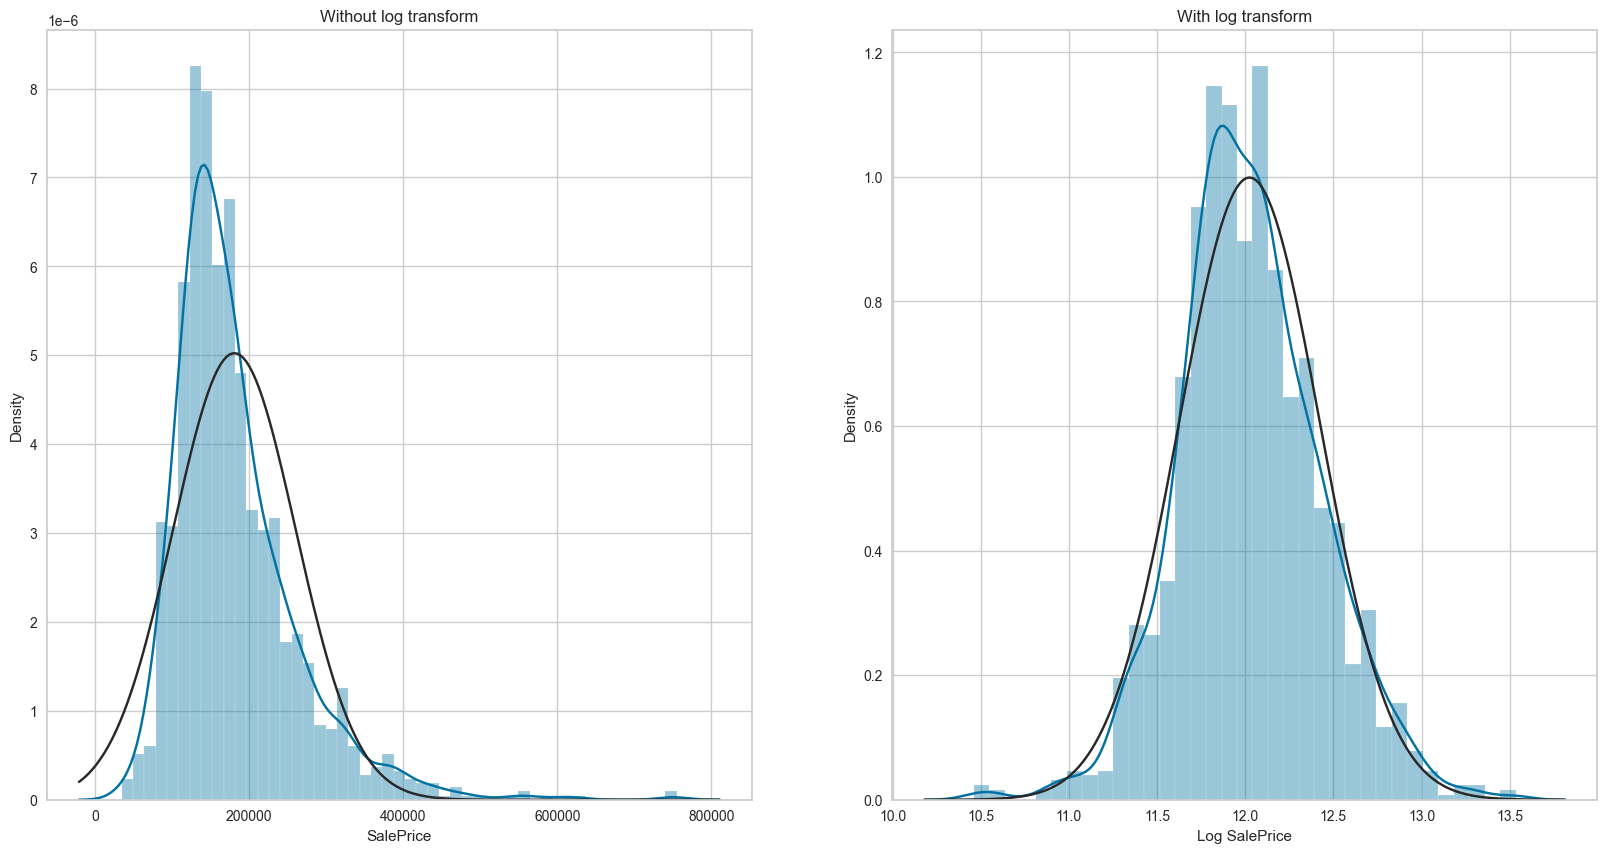

In [121]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without log transform")

plt.subplot(1, 2, 2)
# wa7na mssh khyfeen mn al log 3shan 22l haga fal target greater than zero f msh htbooz
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.xlabel('Log SalePrice')
plt.title("With log transform")

plt.show();

In [122]:
log_target = np.log(target)

In [123]:
log_target 
# lw 3ayz arg3 ll main target exp al target y3ny 3ks al log wkhlas afhm b2a
# np.exp(log_target)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [124]:
# print(train0.shape)
# print(test0.shape)
# print(data6.shape)

## Split Data

In [125]:
print(data8.shape)
print(train0.shape)
print(test0.shape)

(2919, 989)
(1460, 81)
(1459, 80)


In [126]:
train_final = data7.loc[:train0.index.max(), :].copy()
test_final = data7.loc[train0.index.max()+1:, :].reset_index(drop=True).copy()

print(train_final.shape)
print(test_final.shape)

(1460, 989)
(1459, 989)


## Model Selection

In [127]:
# _ = setup(data = pd.concat([train_final, log_target], axis=1), target='SalePrice')

This Function call me what is the besst model can use de blnsba ll data bt3ty fkan a7sn haga catboost regressor

In [128]:
# https://towardsdatascience.com/5-things-you-are-doing-wrong-in-pycaret-e01981575d2a
# top10models = compare_models(n_select=10)
# doul a7sn 5 model momken astkhdmhom ll data bt3ty bs tb3n wla wa7d fehom drsnhom f hnshoof hn3ml eh

In [129]:
# predict_model(top5[0])
# top5
# print("Best Model ",top10models[0])

## Baseline Model

In [130]:
#Using CatBoost since that it had best results

model = CatBoostRegressor(random_state=42,verbose=0,iterations=300,depth=6,learning_rate=0.1,l2_leaf_reg=1)
model.fit(train_final,log_target)
final_predict = np.exp(model.predict(test_final))
# Using cat regressor gives us the best results

In [131]:
# baseline_model = CatBoostRegressor(verbose=0)

In [132]:
# baseline_model.fit(train_final, log_target)

In [133]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
# kf = KFold(n_splits=10)
# results = cross_val_score(baseline_model, train_final, log_target, scoring = 'neg_mean_squared_error', cv =kf)

In [134]:
# print(len(log_target))
# print(results)
# r2_score(log_target, results)
# -results

In [135]:
# np.exp(np.sqrt(np.mean(-results)))

In [136]:
# final_predict = baseline_model.predict(test_final)
# final_true = sample_submission['SalePrice']
# print(final_predict.shape)
# print(final_true.shape)
# final_predict = np.exp(final_predict)
# final_true = np.log1p(final_true)
# print(np.array(final_true))
# print(final_predict)
# final_predict

# print("r2 = ", r2_score(final_true,final_predict))
# print("mean square error= ", mean_squared_error(final_true,final_predict))
# print("mean absolute error= ",mean_absolute_error(final_true, final_predict))

# print(final_predict.shape)
# print(log_target.shape)
# """ 
# 0       169277.052498
# 1       187758.393989
# 2       183583.683570
# 3       179317.477511
# 4       150730.079977
#             ...      
# 1454    167081.220949
# 1455    164788.778231
# 1456    219222.423400
# 1457    184924.279659
# 1458    187741.866657
# """

In [455]:
# plt.figure(figsize=(5,2.5))

# sns.displot(-results, bins = 10, kde=True)
# plt.show()

## Try linear Regression
- waktshfna alhwa haga zaee alzft fhn3mlo comment wnsebo wnrmeeh fe ai hta

In [ ]:
# lr_model = LinearRegression()

In [ ]:
# lr_model.fit(train_final, log_target)

In [ ]:
# kf = KFold(n_splits=10)
# results = cross_val_score(lr_model, train_final, log_target, scoring = 'neg_mean_squared_error', cv=kf)

In [ ]:
# np.exp(np.sqrt(np.mean(-results)))
# np.mean(results)

In [ ]:
# plt.figure(figsize=(10,5))

# sns.displot(-results, bins = 10, kde=True)

## Make Sumbission

In [ ]:
# sample_submission

In [ ]:
test_ids

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [83]:
# final_predict = baseline_model.predict(test_final)
# r2_score(log_target,final_predict)
# print(final_predict.shape)
# print(log_target.shape)

(1459,)
(1460,)


In [457]:
submission = pd.concat([test_ids.astype("Int32"), pd.Series(final_predict, name='SalePrice')], axis =1)
submission


Id      SalePrice
0     1461  126915.405899
1     1462  162756.271598
2     1463  195110.529369
3     1464  202098.147983
4     1465  183570.649343
...    ...            ...
1454  2915   81548.277094
1455  2916   81224.552519
1456  2917  156920.500310
1457  2918  109983.489207
1458  2919  214292.241544

[1459 rows x 2 columns]

In [458]:
submission.dtypes

Id             Int32
SalePrice    float64
dtype: object

In [459]:
# submission['Id'] = test
# submission["Id"] = submission["Id"].astype(int)
submission.to_csv('./submission.csv', index=False, header=True)
